In [25]:
import os
import random
import numpy as np
import random
from scipy.misc import imread, imsave, imresize
import matplotlib.pyplot as plt
from multiprocessing import Pool
pool = Pool(processes=4)
plt.rcParams['figure.figsize'] = (12, 8)
pic_shape = (320, 544, 3)
data_dir = "traffic_road_img"
recognition_data_dir = "GTSRB"
res_dir = "GTSDBxGTSRB"

In [11]:
for file in os.listdir(data_dir):
    try:
        path = os.path.join(data_dir, file)
        pic = imresize(imread(path), pic_shape)
        imsave(path, pic)
    except Exception as e:
        os.remove(path)
        print(path)
        print(e)

traffic_road_img/12.jpg
cannot identify image file 'traffic_road_img/12.jpg'
traffic_road_img/120.jpg
cannot identify image file 'traffic_road_img/120.jpg'
traffic_road_img/119.jpg
cannot identify image file 'traffic_road_img/119.jpg'
traffic_road_img/247.jpg
cannot identify image file 'traffic_road_img/247.jpg'
traffic_road_img/219.jpg
cannot identify image file 'traffic_road_img/219.jpg'


In [20]:
backgrounds = np.zeros((0, pic_shape[0], pic_shape[1], pic_shape[2]))
for file in os.listdir(data_dir):
    path = os.path.join(data_dir, file)
    pic = imread(path, mode="RGB")
    pic = np.expand_dims(pic, axis=0)
    print(pic.shape, file)
    backgrounds = np.append(backgrounds, pic, axis=0)

print(backgrounds.shape)

(1, 320, 544, 3) 60.jpg
(1, 320, 544, 3) 252.jpg
(1, 320, 544, 3) 144.jpg
(1, 320, 544, 3) 199.jpeg
(1, 320, 544, 3) 150.jpg
(1, 320, 544, 3) 149.jpg
(1, 320, 544, 3) 176.jpg
(1, 320, 544, 3) 259.jpg
(1, 320, 544, 3) 272.jpg
(1, 320, 544, 3) 20.jpg
(1, 320, 544, 3) 40.jpg
(1, 320, 544, 3) 64.jpg
(1, 320, 544, 3) 80.jpg
(1, 320, 544, 3) 250.jpg
(1, 320, 544, 3) 77.jpg
(1, 320, 544, 3) 191.jpg
(1, 320, 544, 3) 163.jpg
(1, 320, 544, 3) 143.jpg
(1, 320, 544, 3) 262.jpg
(1, 320, 544, 3) 218.jpg
(1, 320, 544, 3) 28.jpg
(1, 320, 544, 3) 245.png
(1, 320, 544, 3) 2.jpg
(1, 320, 544, 3) 59.jpg
(1, 320, 544, 3) 171.jpg
(1, 320, 544, 3) 55.jpg
(1, 320, 544, 3) 21.jpg
(1, 320, 544, 3) 178.jpg
(1, 320, 544, 3) 72.jpg
(1, 320, 544, 3) 137.jpg
(1, 320, 544, 3) 188.jpg
(1, 320, 544, 3) 249.jpg
(1, 320, 544, 3) 69.jpg
(1, 320, 544, 3) 131.jpg
(1, 320, 544, 3) 216.jpg
(1, 320, 544, 3) 100.jpeg
(1, 320, 544, 3) 71.jpg
(1, 320, 544, 3) 200.jpg
(1, 320, 544, 3) 194.jpg
(1, 320, 544, 3) 31.jpg
(1, 320, 544, 

In [27]:
def create_and_save_img(i, pic_path, res, n_ress):
    pic = imread(pic_path)
    h, w, _ = pic.shape
    top_left_h = random.randint(0, pic_shape[0] - h)
    top_left_w = random.randint(0, pic_shape[1] - w)
    res[top_left_h:top_left_h+h, top_left_w:top_left_w+w,:] = pic
    res_name = os.path.join(res_dir, str(n_ress) + ".jpg")
    imsave(res_name, res)
    label_row = ""
    for v in (str(n_ress)+".ppm", top_left_w, top_left_h, top_left_w+w, top_left_h+h, i):
        label_row = label_row + str(v) + ";"
    label_row = label_row[:-1] + "\n"
    return label_row

def get_res_from_image_gen(processes, gt_f):
    label_row = processes.pop(0).get()
    print(label_row)
    gt_f.write(label_row)

n_ress = 0
processes = []
with open(os.path.join(res_dir, "gt.txt"), "w") as gt_f:
    for i in range(43):
        label_dir = os.path.join(recognition_data_dir, str(i).zfill(5))
        for pic_name in os.listdir(label_dir):
            if os.path.splitext(pic_name)[-1] == ".ppm":
                pic_path = os.path.join(label_dir, pic_name)
                p = pool.apply_async(create_and_save_img, (i, pic_path, backgrounds[random.randint(0, backgrounds.shape[0]-1)], n_ress,))
                processes.append(p)
                n_ress += 1
                if len(processes) > 4:
                    get_res_from_image_gen(processes, gt_f)
    while len(processes) != 0:
        get_res_from_image_gen(processes, gt_f)

0.ppm;34;49;77;94;0

1.ppm;393;226;436;269;0

2.ppm;479;188;535;249;0

3.ppm;134;16;172;53;0

4.ppm;166;208;203;245;0

5.ppm;412;84;451;123;0

6.ppm;306;247;358;296;0

7.ppm;304;163;355;215;0

8.ppm;163;67;247;155;0

9.ppm;335;193;367;223;0

10.ppm;412;43;443;73;0

11.ppm;218;35;249;66;0

12.ppm;378;211;411;244;0

13.ppm;126;45;196;119;0

14.ppm;44;167;80;203;0

15.ppm;300;40;344;84;0

16.ppm;22;12;117;106;0

17.ppm;376;229;407;260;0

18.ppm;159;10;240;95;0

19.ppm;217;185;272;241;0

20.ppm;505;106;544;147;0

21.ppm;287;195;372;281;0

22.ppm;309;177;336;205;0

23.ppm;251;162;323;238;0

24.ppm;88;159;131;203;0

25.ppm;164;182;202;221;0

26.ppm;105;44;213;154;0

27.ppm;13;182;45;214;0

28.ppm;496;114;529;144;0

29.ppm;0;154;57;208;0

30.ppm;245;200;315;274;0

31.ppm;229;112;326;209;0

32.ppm;315;137;346;169;0

33.ppm;428;93;458;122;0

34.ppm;353;222;395;265;0

35.ppm;435;70;532;170;0

36.ppm;230;23;286;77;0

37.ppm;244;224;329;311;0

38.ppm;372;84;401;114;0

39.ppm;50;82;87;121;0

40.ppm

320.ppm;113;61;166;117;1

321.ppm;148;25;198;78;1

322.ppm;244;232;288;279;1

323.ppm;302;5;383;87;1

324.ppm;325;73;364;113;1

325.ppm;208;111;242;146;1

326.ppm;414;270;444;302;1

327.ppm;292;109;388;205;1

328.ppm;219;110;254;145;1

329.ppm;462;252;493;283;1

330.ppm;7;236;36;265;1

331.ppm;468;55;503;91;1

332.ppm;399;180;445;225;1

333.ppm;252;51;300;100;1

334.ppm;50;28;104;83;1

335.ppm;62;73;136;147;1

336.ppm;405;248;451;295;1

337.ppm;129;139;157;169;1

338.ppm;113;254;143;282;1

339.ppm;359;66;436;146;1

340.ppm;363;223;411;271;1

341.ppm;422;112;474;175;1

342.ppm;510;270;541;302;1

343.ppm;15;221;54;260;1

344.ppm;334;268;370;305;1

345.ppm;441;80;495;134;1

346.ppm;313;19;382;89;1

347.ppm;35;273;68;304;1

348.ppm;46;89;82;125;1

349.ppm;168;58;223;121;1

350.ppm;47;173;110;236;1

351.ppm;95;92;151;149;1

352.ppm;87;2;120;36;1

353.ppm;463;222;514;273;1

354.ppm;264;122;329;193;1

355.ppm;461;215;498;260;1

356.ppm;268;131;322;185;1

357.ppm;253;157;326;228;1

358.ppm;275

640.ppm;319;78;354;114;1

641.ppm;262;181;326;244;1

642.ppm;434;77;470;114;1

643.ppm;204;169;254;219;1

644.ppm;339;225;401;295;1

645.ppm;200;209;306;317;1

646.ppm;21;67;79;126;1

647.ppm;407;64;444;99;1

648.ppm;433;6;470;44;1

649.ppm;291;175;331;214;1

650.ppm;495;80;535;122;1

651.ppm;264;225;314;274;1

652.ppm;270;59;346;134;1

653.ppm;450;46;488;85;1

654.ppm;258;234;293;268;1

655.ppm;211;245;248;283;1

656.ppm;224;142;249;169;1

657.ppm;39;190;81;233;1

658.ppm;209;121;256;170;1

659.ppm;180;83;207;110;1

660.ppm;445;120;482;158;1

661.ppm;211;2;263;55;1

662.ppm;78;281;104;308;1

663.ppm;300;48;372;121;1

664.ppm;190;143;239;194;1

665.ppm;15;122;88;194;1

666.ppm;375;3;408;38;1

667.ppm;368;206;439;275;1

668.ppm;362;109;395;142;1

669.ppm;500;244;536;280;1

670.ppm;118;210;191;285;1

671.ppm;433;264;473;305;1

672.ppm;266;247;306;289;1

673.ppm;383;1;470;87;1

674.ppm;322;42;364;84;1

675.ppm;216;22;298;104;1

676.ppm;329;18;380;70;1

677.ppm;17;199;48;230;1

678.ppm;91;

957.ppm;393;26;433;68;1

958.ppm;104;1;198;112;1

959.ppm;484;106;523;145;1

960.ppm;191;103;255;168;1

961.ppm;16;145;48;182;1

962.ppm;455;74;505;122;1

963.ppm;127;218;167;258;1

964.ppm;62;165;98;200;1

965.ppm;65;12;112;68;1

966.ppm;384;113;420;149;1

967.ppm;185;58;291;175;1

968.ppm;432;141;483;195;1

969.ppm;271;220;327;276;1

970.ppm;443;17;484;56;1

971.ppm;494;46;529;82;1

972.ppm;468;232;530;303;1

973.ppm;38;101;98;165;1

974.ppm;10;49;79;119;1

975.ppm;224;206;270;253;1

976.ppm;286;5;325;44;1

977.ppm;268;222;313;265;1

978.ppm;277;50;330;103;1

979.ppm;178;182;254;258;1

980.ppm;393;7;436;54;1

981.ppm;391;52;420;82;1

982.ppm;129;245;178;298;1

983.ppm;77;238;115;275;1

984.ppm;310;91;351;131;1

985.ppm;371;203;421;252;1

986.ppm;135;19;217;105;1

987.ppm;467;257;505;295;1

988.ppm;35;92;86;142;1

989.ppm;35;128;78;172;1

990.ppm;269;74;328;132;1

991.ppm;402;109;481;191;1

992.ppm;311;80;419;189;1

993.ppm;455;95;525;165;1

994.ppm;351;10;386;46;1

995.ppm;48;117;125

1269.ppm;173;97;305;229;1

1270.ppm;112;219;151;259;1

1271.ppm;131;104;195;176;1

1272.ppm;405;5;443;43;1

1273.ppm;178;156;312;297;1

1274.ppm;363;189;447;288;1

1275.ppm;4;89;123;209;1

1276.ppm;280;110;319;149;1

1277.ppm;380;44;462;121;1

1278.ppm;502;282;539;319;1

1279.ppm;469;53;509;96;1

1280.ppm;113;229;160;274;1

1281.ppm;287;18;320;52;1

1282.ppm;314;34;382;98;1

1283.ppm;266;172;312;217;1

1284.ppm;286;198;348;265;1

1285.ppm;209;49;264;104;1

1286.ppm;343;12;388;57;1

1287.ppm;502;211;542;254;1

1288.ppm;344;156;389;202;1

1289.ppm;149;125;208;184;1

1290.ppm;336;64;366;93;1

1291.ppm;286;80;323;117;1

1292.ppm;286;18;333;67;1

1293.ppm;222;68;279;126;1

1294.ppm;9;229;43;265;1

1295.ppm;263;16;309;65;1

1296.ppm;120;183;200;264;1

1297.ppm;97;173;151;227;1

1298.ppm;243;169;330;274;1

1299.ppm;240;119;288;169;1

1300.ppm;78;66;120;110;1

1301.ppm;74;49;111;86;1

1302.ppm;432;52;504;126;1

1303.ppm;408;187;441;219;1

1304.ppm;2;144;56;200;1

1305.ppm;425;149;479;205;1

13


1589.ppm;359;190;402;234;1

1590.ppm;238;226;270;260;1

1591.ppm;63;152;138;238;1

1592.ppm;338;253;381;294;1

1593.ppm;82;67;125;113;1

1594.ppm;392;114;450;174;1

1595.ppm;427;224;496;292;1

1596.ppm;53;131;87;163;1

1597.ppm;288;90;359;161;1

1598.ppm;334;75;426;168;1

1599.ppm;187;106;266;194;1

1600.ppm;120;233;167;280;1

1601.ppm;451;133;479;162;1

1602.ppm;216;115;266;166;1

1603.ppm;221;251;251;282;1

1604.ppm;429;235;470;275;1

1605.ppm;317;186;355;222;1

1606.ppm;20;143;77;201;1

1607.ppm;37;246;99;310;1

1608.ppm;225;209;264;245;1

1609.ppm;253;188;310;246;1

1610.ppm;266;22;304;59;1

1611.ppm;162;100;195;132;1

1612.ppm;403;123;449;169;1

1613.ppm;203;225;245;267;1

1614.ppm;466;208;515;258;1

1615.ppm;18;50;104;132;1

1616.ppm;492;106;526;139;1

1617.ppm;460;28;515;82;1

1618.ppm;417;268;447;300;1

1619.ppm;454;232;496;275;1

1620.ppm;79;62;118;99;1

1621.ppm;452;20;499;70;1

1622.ppm;343;113;382;152;1

1623.ppm;510;64;540;99;1

1624.ppm;314;240;383;311;1

1625.ppm;442;61

1906.ppm;389;231;417;261;1

1907.ppm;310;186;397;273;1

1908.ppm;473;86;517;132;1

1909.ppm;171;216;212;269;1

1910.ppm;32;156;102;232;1

1911.ppm;264;32;307;74;1

1912.ppm;168;268;212;313;1

1913.ppm;74;169;148;242;1

1914.ppm;325;48;376;102;1

1915.ppm;447;37;500;91;1

1916.ppm;260;78;296;113;1

1917.ppm;37;190;95;252;1

1918.ppm;486;37;522;73;1

1919.ppm;177;105;247;181;1

1920.ppm;420;244;492;315;1

1921.ppm;313;139;341;167;1

1922.ppm;232;228;264;261;1

1923.ppm;98;139;143;184;1

1924.ppm;99;79;142;122;1

1925.ppm;420;121;458;158;1

1926.ppm;396;113;445;162;1

1927.ppm;137;75;212;150;1

1928.ppm;38;19;109;88;1

1929.ppm;193;79;274;170;1

1930.ppm;3;188;84;270;1

1931.ppm;134;200;193;259;1

1932.ppm;427;242;486;301;1

1933.ppm;188;187;247;246;1

1934.ppm;142;272;185;315;1

1935.ppm;159;74;192;106;1

1936.ppm;452;35;482;66;1

1937.ppm;153;11;251;109;1

1938.ppm;49;119;122;190;1

1939.ppm;167;261;221;317;1

1940.ppm;50;26;102;76;1

1941.ppm;496;117;543;164;1

1942.ppm;332;114;385;167

2222.ppm;81;228;114;260;1

2223.ppm;381;68;435;121;1

2224.ppm;79;108;124;154;1

2225.ppm;392;148;427;182;1

2226.ppm;286;168;315;199;1

2227.ppm;56;84;109;137;1

2228.ppm;84;162;134;211;1

2229.ppm;322;253;378;307;1

2230.ppm;430;21;487;83;1

2231.ppm;282;45;316;80;1

2232.ppm;396;216;439;258;1

2233.ppm;104;244;163;301;1

2234.ppm;207;232;260;287;1

2235.ppm;407;97;512;203;1

2236.ppm;27;202;69;245;1

2237.ppm;51;185;107;241;1

2238.ppm;437;152;491;204;1

2239.ppm;147;125;200;179;1

2240.ppm;505;261;539;293;1

2241.ppm;358;184;468;315;1

2242.ppm;252;251;289;288;1

2243.ppm;78;117;116;155;1

2244.ppm;289;53;343;112;1

2245.ppm;239;148;282;198;1

2246.ppm;28;79;71;122;1

2247.ppm;436;126;470;161;1

2248.ppm;373;227;428;294;1

2249.ppm;336;100;399;163;1

2250.ppm;66;73;129;137;1

2251.ppm;501;48;535;84;1

2252.ppm;254;155;303;205;1

2253.ppm;82;52;122;89;1

2254.ppm;43;87;79;123;1

2255.ppm;120;154;177;211;1

2256.ppm;55;140;141;225;1

2257.ppm;117;211;158;252;1

2258.ppm;232;192;286;2

2542.ppm;86;145;132;191;2

2543.ppm;265;163;296;195;2

2544.ppm;35;260;82;310;2

2545.ppm;76;10;110;45;2

2546.ppm;11;109;53;150;2

2547.ppm;82;155;111;184;2

2548.ppm;297;178;429;302;2

2549.ppm;64;151;92;179;2

2550.ppm;249;105;283;140;2

2551.ppm;282;118;317;153;2

2552.ppm;251;252;281;280;2

2553.ppm;436;134;471;173;2

2554.ppm;310;164;347;204;2

2555.ppm;214;77;299;165;2

2556.ppm;252;85;290;124;2

2557.ppm;418;146;454;182;2

2558.ppm;119;275;162;316;2

2559.ppm;497;136;525;164;2

2560.ppm;108;227;162;279;2

2561.ppm;413;272;453;311;2

2562.ppm;133;137;180;178;2

2563.ppm;220;194;258;233;2

2564.ppm;145;187;181;223;2

2565.ppm;352;41;392;81;2

2566.ppm;325;115;411;202;2

2567.ppm;463;64;511;106;2

2568.ppm;111;282;143;314;2

2569.ppm;47;95;92;140;2

2570.ppm;211;138;255;182;2

2571.ppm;458;212;530;286;2

2572.ppm;299;61;383;146;2

2573.ppm;236;193;266;223;2

2574.ppm;391;32;432;74;2

2575.ppm;417;5;457;43;2

2576.ppm;275;17;315;57;2

2577.ppm;159;69;208;119;2

2578.ppm;378;21;435;

2861.ppm;374;21;423;69;2

2862.ppm;124;231;199;312;2

2863.ppm;337;142;407;212;2

2864.ppm;225;85;272;136;2

2865.ppm;68;267;96;294;2

2866.ppm;18;196;60;237;2

2867.ppm;46;37;77;70;2

2868.ppm;175;262;210;297;2

2869.ppm;312;115;343;148;2

2870.ppm;68;111;105;146;2

2871.ppm;149;222;223;296;2

2872.ppm;131;41;171;82;2

2873.ppm;352;269;379;296;2

2874.ppm;75;9;105;40;2

2875.ppm;300;286;329;316;2

2876.ppm;483;232;522;272;2

2877.ppm;402;201;432;233;2

2878.ppm;220;146;291;218;2

2879.ppm;434;203;478;247;2

2880.ppm;237;62;287;110;2

2881.ppm;500;116;537;152;2

2882.ppm;513;243;539;269;2

2883.ppm;74;242;111;281;2

2884.ppm;69;71;114;117;2

2885.ppm;89;69;117;98;2

2886.ppm;452;127;489;164;2

2887.ppm;16;254;47;287;2

2888.ppm;297;175;325;204;2

2889.ppm;346;187;402;242;2

2890.ppm;69;197;107;239;2

2891.ppm;456;57;530;131;2

2892.ppm;316;20;343;49;2

2893.ppm;350;30;396;75;2

2894.ppm;326;163;356;193;2

2895.ppm;278;137;310;169;2

2896.ppm;209;116;243;149;2

2897.ppm;291;261;337;307;

3179.ppm;402;246;442;285;2

3180.ppm;426;152;481;207;2

3181.ppm;326;199;364;233;2

3182.ppm;127;162;169;205;2

3183.ppm;247;22;281;58;2

3184.ppm;444;184;479;221;2

3185.ppm;207;172;241;209;2

3186.ppm;5;257;51;304;2

3187.ppm;156;11;204;61;2

3188.ppm;189;190;233;233;2

3189.ppm;88;10;142;64;2

3190.ppm;459;169;496;208;2

3191.ppm;109;59;152;102;2

3192.ppm;167;49;202;81;2

3193.ppm;179;37;225;86;2

3194.ppm;241;21;278;59;2

3195.ppm;328;114;379;165;2

3196.ppm;158;153;189;186;2

3197.ppm;155;4;192;41;2

3198.ppm;154;80;214;141;2

3199.ppm;247;243;276;273;2

3200.ppm;408;170;448;210;2

3201.ppm;319;206;358;246;2

3202.ppm;456;3;484;30;2

3203.ppm;263;250;298;286;2

3204.ppm;366;161;402;197;2

3205.ppm;99;1;149;48;2

3206.ppm;493;292;522;320;2

3207.ppm;184;161;223;199;2

3208.ppm;61;217;95;252;2

3209.ppm;435;187;472;223;2

3210.ppm;179;173;237;229;2

3211.ppm;113;75;143;105;2

3212.ppm;461;234;507;282;2

3213.ppm;304;60;334;91;2

3214.ppm;463;175;518;229;2

3215.ppm;484;41;513;69;2


3499.ppm;177;135;233;191;2

3500.ppm;174;80;220;128;2

3501.ppm;509;286;542;318;2

3502.ppm;354;175;391;213;2

3503.ppm;193;115;223;147;2

3504.ppm;77;55;123;102;2

3505.ppm;507;107;537;138;2

3506.ppm;284;82;404;199;2

3507.ppm;310;120;345;154;2

3508.ppm;242;214;314;291;2

3509.ppm;467;198;499;230;2

3510.ppm;12;156;84;228;2

3511.ppm;437;73;510;152;2

3512.ppm;56;35;144;129;2

3513.ppm;133;111;162;140;2

3514.ppm;337;241;388;290;2

3515.ppm;130;151;156;178;2

3516.ppm;496;214;532;253;2

3517.ppm;32;64;76;103;2

3518.ppm;264;213;322;273;2

3519.ppm;134;278;172;317;2

3520.ppm;233;218;265;250;2

3521.ppm;106;19;223;143;2

3522.ppm;454;256;492;294;2

3523.ppm;234;276;266;307;2

3524.ppm;180;68;211;99;2

3525.ppm;492;186;522;217;2

3526.ppm;417;52;454;85;2

3527.ppm;83;124;109;153;2

3528.ppm;215;189;278;253;2

3529.ppm;263;144;295;178;2

3530.ppm;302;116;340;152;2

3531.ppm;40;63;80;102;2

3532.ppm;440;2;515;78;2

3533.ppm;402;81;446;128;2

3534.ppm;181;27;236;82;2

3535.ppm;289;0;352;

3819.ppm;128;245;162;279;2

3820.ppm;266;155;308;198;2

3821.ppm;183;32;217;67;2

3822.ppm;41;8;139;104;2

3823.ppm;165;76;201;112;2

3824.ppm;423;182;485;246;2

3825.ppm;232;22;294;90;2

3826.ppm;385;34;428;76;2

3827.ppm;283;64;336;115;2

3828.ppm;77;95;123;139;2

3829.ppm;368;172;438;241;2

3830.ppm;246;155;277;187;2

3831.ppm;437;220;497;283;2

3832.ppm;312;212;360;263;2

3833.ppm;341;231;402;292;2

3834.ppm;39;134;67;163;2

3835.ppm;384;223;421;261;2

3836.ppm;33;178;71;218;2

3837.ppm;210;146;239;174;2

3838.ppm;63;200;122;258;2

3839.ppm;46;193;110;255;2

3840.ppm;351;109;405;166;2

3841.ppm;213;159;240;185;2

3842.ppm;243;198;281;236;2

3843.ppm;488;130;535;176;2

3844.ppm;373;253;406;288;2

3845.ppm;240;1;277;40;2

3846.ppm;305;222;337;255;2

3847.ppm;445;61;498;114;2

3848.ppm;23;273;65;315;2

3849.ppm;222;107;249;133;2

3850.ppm;160;208;216;263;2

3851.ppm;41;116;79;154;2

3852.ppm;58;260;85;288;2

3853.ppm;172;102;203;133;2

3854.ppm;432;275;467;310;2

3855.ppm;170;158;242;

4135.ppm;77;146;112;184;2

4136.ppm;197;33;224;61;2

4137.ppm;64;131;99;165;2

4138.ppm;218;81;250;114;2

4139.ppm;114;71;173;130;2

4140.ppm;319;219;375;271;2

4141.ppm;127;53;159;85;2

4142.ppm;313;217;343;246;2

4143.ppm;297;130;329;163;2

4144.ppm;85;98;114;128;2

4145.ppm;364;225;393;253;2

4146.ppm;166;4;199;37;2

4147.ppm;337;70;392;126;2

4148.ppm;473;187;516;230;2

4149.ppm;258;221;310;274;2

4150.ppm;188;138;221;171;2

4151.ppm;108;258;140;291;2

4152.ppm;85;59;114;89;2

4153.ppm;220;11;300;92;2

4154.ppm;233;188;273;229;2

4155.ppm;265;274;301;310;2

4156.ppm;158;57;202;95;2

4157.ppm;169;207;211;248;2

4158.ppm;385;212;414;241;2

4159.ppm;126;92;172;138;2

4160.ppm;14;59;52;98;2

4161.ppm;216;65;254;104;2

4162.ppm;409;114;470;175;2

4163.ppm;499;117;528;146;2

4164.ppm;425;50;460;84;2

4165.ppm;302;246;339;284;2

4166.ppm;122;94;166;139;2

4167.ppm;20;239;57;277;2

4168.ppm;443;205;493;254;2

4169.ppm;259;75;293;109;2

4170.ppm;236;39;289;94;2

4171.ppm;371;264;411;303;2



4454.ppm;99;13;132;47;2

4455.ppm;421;54;458;94;2

4456.ppm;407;268;446;309;2

4457.ppm;315;54;358;95;2

4458.ppm;449;153;482;186;2

4459.ppm;334;175;384;227;2

4460.ppm;345;196;391;242;2

4461.ppm;158;68;197;108;2

4462.ppm;286;27;320;60;2

4463.ppm;37;161;89;210;2

4464.ppm;510;17;542;50;2

4465.ppm;119;109;236;219;2

4466.ppm;276;125;307;155;2

4467.ppm;170;126;206;162;2

4468.ppm;154;218;207;270;2

4469.ppm;296;270;338;312;2

4470.ppm;229;5;258;34;2

4471.ppm;212;64;262;115;2

4472.ppm;36;92;64;119;2

4473.ppm;414;54;449;90;2

4474.ppm;350;62;379;92;2

4475.ppm;226;107;287;170;2

4476.ppm;441;194;478;231;2

4477.ppm;402;154;455;208;2

4478.ppm;472;188;523;239;2

4479.ppm;162;154;235;229;2

4480.ppm;375;29;424;79;2

4481.ppm;119;8;192;81;2

4482.ppm;192;177;234;219;2

4483.ppm;295;229;363;297;2

4484.ppm;186;280;219;313;2

4485.ppm;243;225;276;259;2

4486.ppm;152;270;192;311;2

4487.ppm;47;200;130;284;2

4488.ppm;237;235;271;270;2

4489.ppm;239;236;295;290;2

4490.ppm;218;22;279;83;

4772.ppm;5;50;44;88;3

4773.ppm;151;274;191;318;3

4774.ppm;485;244;541;299;3

4775.ppm;111;233;139;262;3

4776.ppm;412;54;452;96;3

4777.ppm;42;63;75;98;3

4778.ppm;466;72;534;140;3

4779.ppm;9;132;44;167;3

4780.ppm;233;204;265;235;3

4781.ppm;169;88;202;121;3

4782.ppm;176;187;224;239;3

4783.ppm;137;205;186;254;3

4784.ppm;277;269;306;300;3

4785.ppm;303;75;431;203;3

4786.ppm;164;154;195;184;3

4787.ppm;199;239;235;276;3

4788.ppm;236;87;274;126;3

4789.ppm;214;56;261;104;3

4790.ppm;334;193;407;265;3

4791.ppm;27;220;79;272;3

4792.ppm;189;100;264;180;3

4793.ppm;218;190;250;222;3

4794.ppm;343;216;411;284;3

4795.ppm;455;140;489;176;3

4796.ppm;129;35;277;190;3

4797.ppm;435;48;478;92;3

4798.ppm;391;155;504;274;3

4799.ppm;43;16;82;57;3

4800.ppm;240;231;290;283;3

4801.ppm;198;219;234;253;3

4802.ppm;445;224;472;254;3

4803.ppm;9;9;39;39;3

4804.ppm;150;257;181;289;3

4805.ppm;178;78;288;197;3

4806.ppm;448;49;498;100;3

4807.ppm;276;76;311;112;3

4808.ppm;459;21;487;52;3

480

5088.ppm;76;149;121;194;3

5089.ppm;73;83;116;125;3

5090.ppm;390;123;448;182;3

5091.ppm;287;97;315;127;3

5092.ppm;145;211;174;240;3

5093.ppm;75;58;129;114;3

5094.ppm;231;43;289;102;3

5095.ppm;155;97;186;130;3

5096.ppm;499;90;533;123;3

5097.ppm;129;121;177;169;3

5098.ppm;335;135;408;211;3

5099.ppm;375;135;411;171;3

5100.ppm;69;129;102;162;3

5101.ppm;18;46;61;88;3

5102.ppm;102;2;197;102;3

5103.ppm;226;152;296;224;3

5104.ppm;72;27;110;65;3

5105.ppm;445;122;494;171;3

5106.ppm;68;92;104;127;3

5107.ppm;459;109;511;162;3

5108.ppm;349;70;379;100;3

5109.ppm;132;189;170;228;3

5110.ppm;144;87;186;128;3

5111.ppm;122;21;155;56;3

5112.ppm;159;125;196;162;3

5113.ppm;30;147;111;229;3

5114.ppm;103;176;136;209;3

5115.ppm;37;112;78;154;3

5116.ppm;428;104;465;142;3

5117.ppm;301;96;345;139;3

5118.ppm;469;41;503;75;3

5119.ppm;355;80;401;128;3

5120.ppm;142;24;175;58;3

5121.ppm;75;223;117;265;3

5122.ppm;275;216;323;264;3

5123.ppm;386;21;415;51;3

5124.ppm;54;10;89;47;3

5125.

5411.ppm;375;163;424;214;3

5412.ppm;314;161;357;206;3

5413.ppm;325;131;406;216;3

5414.ppm;55;135;91;171;3

5415.ppm;314;184;341;212;3

5416.ppm;199;244;226;273;3

5417.ppm;71;238;103;273;3

5418.ppm;293;40;373;123;3

5419.ppm;73;110;145;183;3

5420.ppm;254;4;321;73;3

5421.ppm;367;3;427;64;3

5422.ppm;297;129;342;177;3

5423.ppm;501;32;536;69;3

5424.ppm;15;144;50;179;3

5425.ppm;388;241;429;280;3

5426.ppm;61;131;90;159;3

5427.ppm;102;131;132;161;3

5428.ppm;50;92;99;139;3

5429.ppm;420;248;451;282;3

5430.ppm;5;207;56;258;3

5431.ppm;167;96;216;145;3

5432.ppm;286;69;328;111;3

5433.ppm;53;245;83;274;3

5434.ppm;462;152;520;208;3

5435.ppm;131;232;181;284;3

5436.ppm;107;86;138;116;3

5437.ppm;328;158;358;190;3

5438.ppm;310;154;346;191;3

5439.ppm;272;251;324;303;3

5440.ppm;316;108;350;140;3

5441.ppm;9;52;55;97;3

5442.ppm;236;36;273;72;3

5443.ppm;12;242;58;291;3

5444.ppm;453;204;503;253;3

5445.ppm;218;148;255;186;3

5446.ppm;52;119;153;225;3

5447.ppm;377;161;416;200;3

54

5728.ppm;429;227;502;310;3

5729.ppm;1;58;55;116;3

5730.ppm;135;84;164;112;3

5731.ppm;260;173;287;200;3

5732.ppm;396;251;439;295;3

5733.ppm;55;38;98;84;3

5734.ppm;286;93;328;136;3

5735.ppm;431;44;513;131;3

5736.ppm;423;211;462;250;3

5737.ppm;342;270;378;305;3

5738.ppm;368;101;401;133;3

5739.ppm;508;250;537;281;3

5740.ppm;53;125;110;182;3

5741.ppm;414;137;454;178;3

5742.ppm;260;35;302;75;3

5743.ppm;374;96;410;133;3

5744.ppm;172;8;209;46;3

5745.ppm;53;208;107;266;3

5746.ppm;95;142;138;187;3

5747.ppm;386;196;414;224;3

5748.ppm;288;0;314;28;3

5749.ppm;453;67;507;117;3

5750.ppm;494;171;532;209;3

5751.ppm;330;114;390;173;3

5752.ppm;187;85;214;113;3

5753.ppm;73;239;112;279;3

5754.ppm;305;158;335;188;3

5755.ppm;244;163;286;205;3

5756.ppm;342;227;379;264;3

5757.ppm;490;172;523;205;3

5758.ppm;225;95;260;133;3

5759.ppm;98;249;136;287;3

5760.ppm;127;269;169;315;3

5761.ppm;499;49;542;93;3

5762.ppm;103;41;183;122;3

5763.ppm;58;185;128;256;3

5764.ppm;186;156;215;185

6047.ppm;299;60;333;95;3

6048.ppm;208;168;244;204;3

6049.ppm;16;61;45;90;3

6050.ppm;252;177;280;205;3

6051.ppm;168;30;194;58;3

6052.ppm;185;116;228;162;3

6053.ppm;357;67;386;98;3

6054.ppm;441;196;511;269;3

6055.ppm;382;117;416;151;3

6056.ppm;258;12;303;59;3

6057.ppm;402;214;446;258;3

6058.ppm;409;48;445;85;3

6059.ppm;440;95;484;141;3

6060.ppm;47;164;80;198;3

6061.ppm;304;68;398;172;3

6062.ppm;467;257;505;296;3

6063.ppm;280;250;328;301;3

6064.ppm;345;130;387;173;3

6065.ppm;1;58;47;103;3

6066.ppm;121;83;149;112;3

6067.ppm;291;112;349;168;3

6068.ppm;27;39;63;74;3

6069.ppm;110;79;148;119;3

6070.ppm;443;142;479;177;3

6071.ppm;464;120;505;160;3

6072.ppm;292;130;324;163;3

6073.ppm;240;127;299;186;3

6074.ppm;293;206;324;237;3

6075.ppm;205;234;259;287;3

6076.ppm;343;168;377;202;3

6077.ppm;287;148;316;177;3

6078.ppm;367;226;436;291;3

6079.ppm;18;263;51;298;3

6080.ppm;368;11;397;39;3

6081.ppm;325;14;449;145;3

6082.ppm;355;32;394;73;3

6083.ppm;444;0;477;33;3

60

6362.ppm;416;207;501;291;4

6363.ppm;14;150;56;192;4

6364.ppm;329;122;364;156;4

6365.ppm;340;227;382;271;4

6366.ppm;249;18;278;47;4

6367.ppm;380;64;429;112;4

6368.ppm;504;93;537;126;4

6369.ppm;198;157;254;214;4

6370.ppm;166;126;236;197;4

6371.ppm;185;204;220;241;4

6372.ppm;118;70;148;100;4

6373.ppm;476;135;510;169;4

6374.ppm;159;133;210;188;4

6375.ppm;81;122;151;196;4

6376.ppm;412;247;442;278;4

6377.ppm;468;191;510;234;4

6378.ppm;353;267;401;316;4

6379.ppm;40;102;153;231;4

6380.ppm;326;124;390;188;4

6381.ppm;33;56;95;118;4

6382.ppm;262;225;319;282;4

6383.ppm;97;86;145;134;4

6384.ppm;241;163;287;210;4

6385.ppm;344;195;427;274;4

6386.ppm;106;254;153;301;4

6387.ppm;51;101;106;153;4

6388.ppm;76;190;145;262;4

6389.ppm;492;189;529;224;4

6390.ppm;421;275;453;307;4

6391.ppm;402;19;439;57;4

6392.ppm;218;135;273;190;4

6393.ppm;348;194;384;231;4

6394.ppm;358;178;392;210;4

6395.ppm;198;237;250;290;4

6396.ppm;423;62;459;99;4

6397.ppm;231;183;262;214;4

6398.ppm;239

6678.ppm;265;219;313;266;4

6679.ppm;156;20;201;66;4

6680.ppm;425;243;461;279;4

6681.ppm;364;191;404;232;4

6682.ppm;435;145;519;228;4

6683.ppm;217;60;261;103;4

6684.ppm;236;57;271;93;4

6685.ppm;41;265;73;296;4

6686.ppm;146;187;194;235;4

6687.ppm;456;81;494;123;4

6688.ppm;300;266;340;306;4

6689.ppm;474;57;519;102;4

6690.ppm;179;234;249;304;4

6691.ppm;253;24;330;107;4

6692.ppm;52;269;98;315;4

6693.ppm;304;219;335;251;4

6694.ppm;356;179;410;236;4

6695.ppm;451;101;494;146;4

6696.ppm;86;91;119;125;4

6697.ppm;222;36;271;85;4

6698.ppm;129;53;182;105;4

6699.ppm;175;200;221;247;4

6700.ppm;347;143;376;172;4

6701.ppm;379;162;423;204;4

6702.ppm;185;63;221;100;4

6703.ppm;497;257;527;287;4

6704.ppm;103;44;160;100;4

6705.ppm;439;70;520;151;4

6706.ppm;84;176;144;237;4

6707.ppm;170;103;208;143;4

6708.ppm;380;269;418;308;4

6709.ppm;246;1;299;53;4

6710.ppm;139;88;184;133;4

6711.ppm;184;83;217;115;4

6712.ppm;204;255;242;292;4

6713.ppm;122;110;152;142;4

6714.ppm;375;47;42

6996.ppm;16;64;60;109;4

6997.ppm;263;107;294;138;4

6998.ppm;326;186;375;235;4

6999.ppm;366;180;429;244;4

7000.ppm;252;103;283;133;4

7001.ppm;27;107;97;179;4

7002.ppm;419;61;447;90;4

7003.ppm;245;0;287;43;4

7004.ppm;372;79;407;113;4

7005.ppm;55;27;92;62;4

7006.ppm;166;132;220;186;4

7007.ppm;278;103;311;135;4

7008.ppm;251;276;280;306;4

7009.ppm;113;36;146;70;4

7010.ppm;474;152;513;190;4

7011.ppm;432;118;481;167;4

7012.ppm;176;203;233;261;4

7013.ppm;12;34;52;76;4

7014.ppm;404;30;442;67;4

7015.ppm;452;69;490;108;4

7016.ppm;134;101;215;181;4

7017.ppm;338;99;373;137;4

7018.ppm;450;140;519;210;4

7019.ppm;14;213;58;258;4

7020.ppm;392;276;426;311;4

7021.ppm;174;204;202;232;4

7022.ppm;88;68;131;111;4

7023.ppm;285;85;339;138;4

7024.ppm;96;182;155;240;4

7025.ppm;277;120;384;223;4

7026.ppm;302;191;354;241;4

7027.ppm;245;19;276;53;4

7028.ppm;421;74;455;107;4

7029.ppm;34;20;91;78;4

7030.ppm;433;77;467;111;4

7031.ppm;378;135;441;197;4

7032.ppm;96;170;161;234;4

7033

7313.ppm;457;72;487;101;4

7314.ppm;402;223;436;256;4

7315.ppm;194;241;225;273;4

7316.ppm;201;42;245;87;4

7317.ppm;401;108;439;146;4

7318.ppm;451;41;509;102;4

7319.ppm;102;176;212;282;4

7320.ppm;15;173;61;226;4

7321.ppm;175;143;226;197;4

7322.ppm;290;184;322;216;4

7323.ppm;107;34;201;131;4

7324.ppm;4;84;64;144;4

7325.ppm;453;163;487;197;4

7326.ppm;26;256;61;291;4

7327.ppm;170;243;215;288;4

7328.ppm;89;123;124;159;4

7329.ppm;455;215;483;242;4

7330.ppm;56;132;100;178;4

7331.ppm;136;184;182;229;4

7332.ppm;468;0;499;31;4

7333.ppm;287;42;346;101;4

7334.ppm;100;80;154;132;4

7335.ppm;28;250;76;297;4

7336.ppm;53;65;83;96;4

7337.ppm;414;126;441;155;4

7338.ppm;479;27;511;62;4

7339.ppm;309;204;343;237;4

7340.ppm;95;193;145;245;4

7341.ppm;437;269;465;299;4

7342.ppm;101;61;149;109;4

7343.ppm;132;251;175;293;4

7344.ppm;18;51;59;94;4

7345.ppm;265;200;302;237;4

7346.ppm;267;55;308;97;4

7347.ppm;265;196;319;250;4

7348.ppm;325;93;354;122;4

7349.ppm;77;15;110;48;4

7350

7630.ppm;480;252;537;312;4

7631.ppm;313;250;353;290;4

7632.ppm;251;279;290;318;4

7633.ppm;355;228;415;289;4

7634.ppm;300;41;348;89;4

7635.ppm;138;256;173;288;4

7636.ppm;22;27;52;57;4

7637.ppm;26;181;102;263;4

7638.ppm;5;151;121;269;4

7639.ppm;134;232;182;282;4

7640.ppm;485;39;520;76;4

7641.ppm;380;128;450;197;4

7642.ppm;9;166;43;201;4

7643.ppm;191;268;228;308;4

7644.ppm;210;170;240;203;4

7645.ppm;305;133;362;193;4

7646.ppm;101;218;186;301;4

7647.ppm;480;29;524;73;4

7648.ppm;250;175;318;245;4

7649.ppm;386;39;424;76;4

7650.ppm;206;253;235;283;4

7651.ppm;205;244;251;291;4

7652.ppm;313;57;386;131;4

7653.ppm;225;91;367;231;4

7654.ppm;460;288;493;319;4

7655.ppm;232;76;276;125;4

7656.ppm;294;43;320;70;4

7657.ppm;63;188;104;229;4

7658.ppm;126;194;236;302;4

7659.ppm;112;16;170;73;4

7660.ppm;217;226;297;306;4

7661.ppm;278;103;320;145;4

7662.ppm;390;179;431;220;4

7663.ppm;265;202;303;242;4

7664.ppm;245;48;296;101;4

7665.ppm;271;225;318;271;4

7666.ppm;181;135;21

7948.ppm;152;274;186;307;4

7949.ppm;224;62;263;100;4

7950.ppm;365;278;406;319;4

7951.ppm;189;69;232;112;4

7952.ppm;116;159;147;192;4

7953.ppm;15;47;64;97;4

7954.ppm;286;151;318;184;4

7955.ppm;261;67;371;184;4

7956.ppm;172;260;207;294;4

7957.ppm;184;167;210;195;4

7958.ppm;59;49;113;101;4

7959.ppm;191;155;220;184;4

7960.ppm;29;65;127;162;4

7961.ppm;72;246;107;283;4

7962.ppm;173;187;214;227;4

7963.ppm;477;152;510;185;4

7964.ppm;233;9;266;41;4

7965.ppm;359;161;404;204;4

7966.ppm;345;76;378;110;4

7967.ppm;50;261;78;289;4

7968.ppm;304;116;414;226;4

7969.ppm;180;77;216;113;4

7970.ppm;35;83;72;120;4

7971.ppm;167;260;196;291;4

7972.ppm;403;221;471;289;4

7973.ppm;22;194;54;227;4

7974.ppm;260;26;366;133;4

7975.ppm;211;143;241;172;4

7976.ppm;269;30;301;63;4

7977.ppm;96;163;151;219;4

7978.ppm;68;99;99;129;4

7979.ppm;227;287;258;318;4

7980.ppm;348;201;377;231;4

7981.ppm;22;177;52;208;4

7982.ppm;71;101;111;142;4

7983.ppm;282;54;324;98;4

7984.ppm;220;95;276;151;4

7

8269.ppm;160;240;218;300;5

8270.ppm;210;202;308;302;5

8271.ppm;21;64;63;105;5

8272.ppm;367;225;406;266;5

8273.ppm;268;57;332;121;5

8274.ppm;248;49;297;98;5

8275.ppm;154;262;183;291;5

8276.ppm;257;80;332;161;5

8277.ppm;193;70;228;104;5

8278.ppm;55;128;91;163;5

8279.ppm;174;209;209;245;5

8280.ppm;41;101;91;150;5

8281.ppm;129;262;167;300;5

8282.ppm;83;219;121;257;5

8283.ppm;89;97;124;131;5

8284.ppm;199;241;246;288;5

8285.ppm;400;14;437;48;5

8286.ppm;345;132;377;161;5

8287.ppm;321;159;397;241;5

8288.ppm;463;202;499;236;5

8289.ppm;190;98;222;129;5

8290.ppm;0;142;30;171;5

8291.ppm;171;23;224;78;5

8292.ppm;501;155;537;192;5

8293.ppm;91;69;214;200;5

8294.ppm;259;143;345;229;5

8295.ppm;171;243;200;271;5

8296.ppm;330;279;359;307;5

8297.ppm;306;238;334;266;5

8298.ppm;385;200;415;230;5

8299.ppm;315;35;351;73;5

8300.ppm;449;46;476;74;5

8301.ppm;77;238;107;268;5

8302.ppm;326;275;352;303;5

8303.ppm;268;237;306;277;5

8304.ppm;419;7;475;62;5

8305.ppm;396;181;463;248;

8584.ppm;359;60;389;89;5

8585.ppm;495;81;527;113;5

8586.ppm;313;238;350;275;5

8587.ppm;48;191;97;241;5

8588.ppm;128;68;168;108;5

8589.ppm;281;23;320;61;5

8590.ppm;392;189;466;264;5

8591.ppm;227;143;275;193;5

8592.ppm;169;14;196;43;5

8593.ppm;218;273;246;301;5

8594.ppm;225;252;278;303;5

8595.ppm;88;63;119;95;5

8596.ppm;396;250;443;293;5

8597.ppm;308;226;336;254;5

8598.ppm;334;14;363;42;5

8599.ppm;8;239;53;278;5

8600.ppm;89;196;152;259;5

8601.ppm;21;265;50;294;5

8602.ppm;133;119;168;157;5

8603.ppm;155;230;184;257;5

8604.ppm;402;176;439;212;5

8605.ppm;371;27;426;86;5

8606.ppm;338;136;373;173;5

8607.ppm;217;8;264;59;5

8608.ppm;303;188;346;231;5

8609.ppm;406;69;471;133;5

8610.ppm;1;243;32;274;5

8611.ppm;60;66;110;116;5

8612.ppm;127;38;162;72;5

8613.ppm;67;125;119;177;5

8614.ppm;96;25;132;61;5

8615.ppm;138;253;183;295;5

8616.ppm;452;110;482;142;5

8617.ppm;396;106;435;143;5

8618.ppm;382;77;417;113;5

8619.ppm;492;194;534;239;5

8620.ppm;176;58;210;92;5

8621.

8906.ppm;259;178;286;205;5

8907.ppm;332;216;368;254;5

8908.ppm;252;7;308;68;5

8909.ppm;240;66;272;99;5

8910.ppm;146;236;179;269;5

8911.ppm;188;163;220;193;5

8912.ppm;60;104;108;152;5

8913.ppm;215;95;275;159;5

8914.ppm;217;7;248;39;5

8915.ppm;378;96;411;132;5

8916.ppm;175;146;212;183;5

8917.ppm;116;99;171;152;5

8918.ppm;168;265;205;304;5

8919.ppm;427;1;464;37;5

8920.ppm;500;81;532;112;5

8921.ppm;397;116;437;157;5

8922.ppm;450;228;502;280;5

8923.ppm;194;252;222;280;5

8924.ppm;357;81;433;165;5

8925.ppm;222;135;249;161;5

8926.ppm;91;11;136;50;5

8927.ppm;67;259;101;292;5

8928.ppm;398;220;433;258;5

8929.ppm;362;22;389;48;5

8930.ppm;157;161;185;188;5

8931.ppm;26;71;58;102;5

8932.ppm;234;122;274;162;5

8933.ppm;262;18;297;53;5

8934.ppm;491;181;534;231;5

8935.ppm;382;53;413;85;5

8936.ppm;116;285;146;314;5

8937.ppm;208;164;250;207;5

8938.ppm;281;47;338;105;5

8939.ppm;136;275;178;316;5

8940.ppm;236;32;275;74;5

8941.ppm;352;153;390;192;5

8942.ppm;390;126;431;166;

9221.ppm;506;157;537;188;5

9222.ppm;73;261;110;295;5

9223.ppm;108;107;146;144;5

9224.ppm;204;59;290;146;5

9225.ppm;7;87;52;135;5

9226.ppm;230;73;305;147;5

9227.ppm;204;140;239;176;5

9228.ppm;9;158;39;187;5

9229.ppm;267;151;337;220;5

9230.ppm;205;117;288;198;5

9231.ppm;320;5;355;42;5

9232.ppm;184;205;223;243;5

9233.ppm;278;199;319;241;5

9234.ppm;180;8;209;39;5

9235.ppm;457;182;486;211;5

9236.ppm;29;233;74;279;5

9237.ppm;347;133;382;167;5

9238.ppm;507;210;535;236;5

9239.ppm;123;208;172;253;5

9240.ppm;377;253;423;301;5

9241.ppm;187;232;217;262;5

9242.ppm;331;197;358;225;5

9243.ppm;280;236;313;268;5

9244.ppm;46;194;83;230;5

9245.ppm;444;128;479;163;5

9246.ppm;239;81;270;112;5

9247.ppm;132;88;172;131;5

9248.ppm;437;70;473;103;5

9249.ppm;495;91;525;121;5

9250.ppm;419;137;452;175;5

9251.ppm;432;89;494;154;5

9252.ppm;232;138;262;168;5

9253.ppm;157;171;190;204;5

9254.ppm;375;27;402;54;5

9255.ppm;448;47;486;85;5

9256.ppm;422;1;451;30;5

9257.ppm;309;42;343;73;5

9536.ppm;301;210;351;253;5

9537.ppm;271;103;352;188;5

9538.ppm;494;145;521;172;5

9539.ppm;489;217;533;260;5

9540.ppm;141;278;174;311;5

9541.ppm;285;192;315;223;5

9542.ppm;27;29;61;64;5

9543.ppm;169;63;217;112;5

9544.ppm;487;82;537;135;5

9545.ppm;47;146;100;200;5

9546.ppm;497;272;523;298;5

9547.ppm;122;56;159;94;5

9548.ppm;221;96;316;196;5

9549.ppm;234;40;339;148;5

9550.ppm;473;174;524;226;5

9551.ppm;317;108;364;150;5

9552.ppm;379;203;411;234;5

9553.ppm;80;42;131;93;5

9554.ppm;310;44;347;81;5

9555.ppm;370;94;412;137;5

9556.ppm;57;243;103;291;5

9557.ppm;327;50;369;94;5

9558.ppm;149;69;182;103;5

9559.ppm;454;34;489;69;5

9560.ppm;18;80;53;117;5

9561.ppm;244;63;283;99;5

9562.ppm;214;133;256;174;5

9563.ppm;303;86;338;120;5

9564.ppm;187;225;235;275;5

9565.ppm;244;93;276;125;5

9566.ppm;116;148;151;184;5

9567.ppm;140;45;194;100;5

9568.ppm;163;162;283;286;5

9569.ppm;45;178;97;232;5

9570.ppm;412;146;482;219;5

9571.ppm;130;114;188;173;5

9572.ppm;49;68;79;99;5

9

9853.ppm;297;287;328;319;5

9854.ppm;437;279;475;317;5

9855.ppm;377;266;430;318;5

9856.ppm;496;48;530;84;5

9857.ppm;154;173;185;202;5

9858.ppm;202;146;240;181;5

9859.ppm;438;220;477;262;5

9860.ppm;97;6;130;38;5

9861.ppm;262;245;294;277;5

9862.ppm;199;190;255;242;5

9863.ppm;87;168;130;213;5

9864.ppm;320;24;393;95;5

9865.ppm;133;178;179;227;5

9866.ppm;189;113;229;152;5

9867.ppm;208;198;246;233;5

9868.ppm;379;50;409;81;5

9869.ppm;105;79;136;110;5

9870.ppm;140;228;170;258;5

9871.ppm;239;195;271;228;5

9872.ppm;473;15;511;53;5

9873.ppm;285;149;316;181;5

9874.ppm;404;0;432;29;5

9875.ppm;477;205;518;246;5

9876.ppm;476;167;507;200;5

9877.ppm;128;31;168;72;5

9878.ppm;101;239;153;292;5

9879.ppm;214;249;242;276;5

9880.ppm;226;49;263;87;5

9881.ppm;45;169;99;224;5

9882.ppm;84;89;115;120;5

9883.ppm;175;24;213;62;5

9884.ppm;274;119;314;162;5

9885.ppm;366;184;409;224;5

9886.ppm;394;161;437;203;5

9887.ppm;233;63;271;101;5

9888.ppm;12;117;61;168;5

9889.ppm;26;109;78;161

10172.ppm;92;225;132;265;6

10173.ppm;310;167;347;207;6

10174.ppm;301;56;334;92;6

10175.ppm;257;190;302;234;6

10176.ppm;484;244;525;284;6

10177.ppm;450;9;476;37;6

10178.ppm;420;124;447;154;6

10179.ppm;150;215;212;283;6

10180.ppm;20;10;51;43;6

10181.ppm;303;171;331;200;6

10182.ppm;104;236;132;265;6

10183.ppm;126;176;165;216;6

10184.ppm;382;210;412;242;6

10185.ppm;28;45;58;78;6

10186.ppm;460;268;497;307;6

10187.ppm;271;110;334;171;6

10188.ppm;435;49;469;84;6

10189.ppm;115;181;153;221;6

10190.ppm;319;6;355;43;6

10191.ppm;255;204;284;233;6

10192.ppm;422;98;471;150;6

10193.ppm;455;172;487;206;6

10194.ppm;422;106;449;134;6

10195.ppm;13;121;53;162;6

10196.ppm;466;159;493;187;6

10197.ppm;305;271;334;301;6

10198.ppm;390;87;439;140;6

10199.ppm;344;188;376;219;6

10200.ppm;80;254;127;304;6

10201.ppm;408;267;449;309;6

10202.ppm;96;291;123;320;6

10203.ppm;432;106;495;176;6

10204.ppm;45;123;86;165;6

10205.ppm;430;50;473;93;6

10206.ppm;37;224;69;256;6

10207.ppm;309;26

10490.ppm;425;92;481;146;7

10491.ppm;126;6;171;54;7

10492.ppm;509;62;537;90;7

10493.ppm;42;168;77;203;7

10494.ppm;412;123;464;178;7

10495.ppm;442;130;506;200;7

10496.ppm;143;223;174;253;7

10497.ppm;476;60;520;104;7

10498.ppm;384;183;429;228;7

10499.ppm;62;70;92;101;7

10500.ppm;264;197;307;242;7

10501.ppm;89;202;130;244;7

10502.ppm;192;88;224;121;7

10503.ppm;311;175;375;239;7

10504.ppm;196;231;223;259;7

10505.ppm;257;145;314;200;7

10506.ppm;199;265;253;320;7

10507.ppm;10;38;66;94;7

10508.ppm;405;190;472;261;7

10509.ppm;217;202;264;249;7

10510.ppm;281;53;311;84;7

10511.ppm;364;84;425;146;7

10512.ppm;232;184;271;223;7

10513.ppm;507;51;536;80;7

10514.ppm;112;12;189;87;7

10515.ppm;458;118;488;150;7

10516.ppm;7;121;53;168;7

10517.ppm;234;254;269;290;7

10518.ppm;276;225;327;276;7

10519.ppm;441;237;487;283;7

10520.ppm;234;178;268;213;7

10521.ppm;214;269;260;314;7

10522.ppm;124;184;152;213;7

10523.ppm;474;139;543;210;7

10524.ppm;403;283;438;318;7

10525.ppm;354

10808.ppm;434;52;471;88;7

10809.ppm;294;228;331;265;7

10810.ppm;21;15;52;46;7

10811.ppm;179;287;208;316;7

10812.ppm;50;102;86;139;7

10813.ppm;174;92;203;123;7

10814.ppm;27;275;55;305;7

10815.ppm;261;277;288;304;7

10816.ppm;272;278;303;310;7

10817.ppm;19;189;45;214;7

10818.ppm;360;201;412;254;7

10819.ppm;346;111;407;172;7

10820.ppm;504;6;539;41;7

10821.ppm;201;169;246;213;7

10822.ppm;365;130;413;176;7

10823.ppm;183;88;218;127;7

10824.ppm;55;27;97;69;7

10825.ppm;92;23;129;61;7

10826.ppm;247;121;287;162;7

10827.ppm;353;124;390;161;7

10828.ppm;373;136;428;190;7

10829.ppm;204;122;246;165;7

10830.ppm;133;43;210;125;7

10831.ppm;320;169;377;225;7

10832.ppm;9;88;40;119;7

10833.ppm;23;26;61;65;7

10834.ppm;71;254;131;316;7

10835.ppm;451;29;487;66;7

10836.ppm;4;107;37;139;7

10837.ppm;6;225;55;278;7

10838.ppm;37;33;80;76;7

10839.ppm;233;171;278;218;7

10840.ppm;476;16;504;43;7

10841.ppm;372;22;413;65;7

10842.ppm;68;221;103;260;7

10843.ppm;4;59;46;101;7

10844.ppm;7

11126.ppm;344;135;405;194;7

11127.ppm;485;233;523;270;7

11128.ppm;486;145;532;190;7

11129.ppm;103;44;136;77;7

11130.ppm;147;139;191;184;7

11131.ppm;106;128;156;176;7

11132.ppm;33;1;67;36;7

11133.ppm;136;76;182;123;7

11134.ppm;39;261;72;295;7

11135.ppm;332;210;381;257;7

11136.ppm;105;123;132;148;7

11137.ppm;104;266;150;313;7

11138.ppm;289;72;359;149;7

11139.ppm;146;33;178;68;7

11140.ppm;269;49;310;92;7

11141.ppm;386;5;425;45;7

11142.ppm;155;52;180;79;7

11143.ppm;66;239;95;269;7

11144.ppm;171;7;206;41;7

11145.ppm;95;259;134;297;7

11146.ppm;327;75;431;178;7

11147.ppm;33;157;70;194;7

11148.ppm;178;115;283;216;7

11149.ppm;186;139;220;174;7

11150.ppm;269;1;327;61;7

11151.ppm;387;252;418;283;7

11152.ppm;499;139;536;177;7

11153.ppm;417;195;455;234;7

11154.ppm;102;253;134;284;7

11155.ppm;307;196;340;227;7

11156.ppm;349;165;396;212;7

11157.ppm;157;42;199;84;7

11158.ppm;410;106;463;157;7

11159.ppm;186;9;220;43;7

11160.ppm;0;162;38;200;7

11161.ppm;203;43;250;90;7

11444.ppm;421;45;467;92;7

11445.ppm;374;1;401;29;7

11446.ppm;428;136;461;169;7

11447.ppm;197;187;229;218;7

11448.ppm;169;173;210;215;7

11449.ppm;144;76;180;113;7

11450.ppm;417;103;459;147;7

11451.ppm;87;196;119;229;7

11452.ppm;229;56;263;90;7

11453.ppm;376;57;410;91;7

11454.ppm;171;67;214;114;7

11455.ppm;19;155;70;207;7

11456.ppm;103;80;167;144;7

11457.ppm;25;156;85;218;7

11458.ppm;304;149;397;242;7

11459.ppm;214;116;242;145;7

11460.ppm;3;129;34;160;7

11461.ppm;438;111;496;169;7

11462.ppm;379;221;443;288;7

11463.ppm;343;59;412;129;7

11464.ppm;3;120;51;169;7

11465.ppm;424;208;464;247;7

11466.ppm;74;266;114;306;7

11467.ppm;166;17;237;87;7

11468.ppm;215;85;263;135;7

11469.ppm;169;81;198;110;7

11470.ppm;255;226;285;257;7

11471.ppm;83;246;151;314;7

11472.ppm;51;115;148;213;7

11473.ppm;379;156;423;200;7

11474.ppm;10;22;47;59;7

11475.ppm;322;263;379;319;7

11476.ppm;122;58;155;90;7

11477.ppm;55;261;91;298;7

11478.ppm;328;95;391;167;7

11479.ppm;208;191;320;295

11764.ppm;9;257;57;307;7

11765.ppm;499;149;528;177;7

11766.ppm;270;131;355;214;7

11767.ppm;49;243;87;281;7

11768.ppm;228;243;262;279;7

11769.ppm;443;156;477;195;7

11770.ppm;316;94;354;136;7

11771.ppm;425;234;459;269;7

11772.ppm;465;200;514;250;7

11773.ppm;61;54;91;84;7

11774.ppm;61;89;92;122;7

11775.ppm;376;45;431;98;7

11776.ppm;468;118;519;169;7

11777.ppm;97;21;133;58;7

11778.ppm;207;171;286;244;7

11779.ppm;178;68;210;100;7

11780.ppm;360;269;386;297;7

11781.ppm;19;40;100;126;7

11782.ppm;476;278;517;320;7

11783.ppm;274;74;309;109;7

11784.ppm;96;32;272;207;7

11785.ppm;252;172;282;202;7

11786.ppm;231;285;258;313;7

11787.ppm;201;201;258;257;7

11788.ppm;238;100;274;137;7

11789.ppm;369;67;405;103;7

11790.ppm;399;253;432;284;8

11791.ppm;112;279;152;320;8

11792.ppm;329;276;365;312;8

11793.ppm;185;201;242;259;8

11794.ppm;352;269;392;311;8

11795.ppm;255;111;296;153;8

11796.ppm;161;276;197;314;8

11797.ppm;97;42;138;81;8

11798.ppm;394;49;433;88;8

11799.ppm;434;3

12081.ppm;282;170;320;207;8

12082.ppm;130;36;176;81;8

12083.ppm;223;153;249;179;8

12084.ppm;200;54;232;86;8

12085.ppm;1;197;57;255;8

12086.ppm;285;198;315;224;8

12087.ppm;227;137;268;177;8

12088.ppm;119;0;150;33;8

12089.ppm;478;257;510;289;8

12090.ppm;146;227;181;263;8

12091.ppm;215;162;250;198;8

12092.ppm;407;80;454;130;8

12093.ppm;153;50;194;90;8

12094.ppm;281;193;313;225;8

12095.ppm;428;207;497;275;8

12096.ppm;372;166;408;202;8

12097.ppm;124;236;151;264;8

12098.ppm;470;61;521;112;8

12099.ppm;278;137;313;172;8

12100.ppm;392;4;432;43;8

12101.ppm;29;113;61;143;8

12102.ppm;123;192;161;234;8

12103.ppm;252;189;285;222;8

12104.ppm;162;263;192;292;8

12105.ppm;476;221;519;264;8

12106.ppm;352;160;417;224;8

12107.ppm;478;181;512;214;8

12108.ppm;320;10;354;44;8

12109.ppm;14;27;52;67;8

12110.ppm;162;159;245;244;8

12111.ppm;296;138;331;172;8

12112.ppm;85;170;127;211;8

12113.ppm;134;86;175;124;8

12114.ppm;156;253;198;296;8

12115.ppm;490;213;523;245;8

12116.ppm;36

12398.ppm;28;1;73;47;8

12399.ppm;0;251;57;303;8

12400.ppm;279;31;308;64;8

12401.ppm;159;233;220;289;8

12402.ppm;28;216;76;265;8

12403.ppm;106;218;149;262;8

12404.ppm;101;168;134;201;8

12405.ppm;391;125;425;158;8

12406.ppm;151;237;191;277;8

12407.ppm;322;16;408;101;8

12408.ppm;158;195;204;240;8

12409.ppm;361;147;393;180;8

12410.ppm;7;228;47;269;8

12411.ppm;217;227;258;267;8

12412.ppm;264;0;320;56;8

12413.ppm;175;71;218;113;8

12414.ppm;311;198;355;236;8

12415.ppm;68;234;102;265;8

12416.ppm;3;159;37;194;8

12417.ppm;19;94;49;124;8

12418.ppm;272;84;321;136;8

12419.ppm;77;70;130;127;8

12420.ppm;469;82;519;132;8

12421.ppm;307;83;337;114;8

12422.ppm;177;174;223;223;8

12423.ppm;216;82;310;175;8

12424.ppm;260;241;295;277;8

12425.ppm;477;81;520;123;8

12426.ppm;213;189;265;242;8

12427.ppm;397;210;456;269;8

12428.ppm;175;207;246;280;8

12429.ppm;47;71;86;106;8

12430.ppm;345;185;385;226;8

12431.ppm;390;182;415;208;8

12432.ppm;60;193;91;225;8

12433.ppm;439;68;477;107

12714.ppm;265;30;302;68;8

12715.ppm;277;4;350;77;8

12716.ppm;211;235;252;279;8

12717.ppm;400;137;439;177;8

12718.ppm;418;57;456;95;8

12719.ppm;41;273;76;308;8

12720.ppm;423;22;456;56;8

12721.ppm;149;193;189;238;8

12722.ppm;38;55;75;92;8

12723.ppm;398;90;444;139;8

12724.ppm;12;34;42;62;8

12725.ppm;315;42;347;75;8

12726.ppm;343;170;400;230;8

12727.ppm;117;25;150;59;8

12728.ppm;386;237;421;272;8

12729.ppm;96;161;207;277;8

12730.ppm;415;137;467;188;8

12731.ppm;190;186;227;224;8

12732.ppm;394;86;424;114;8

12733.ppm;212;117;241;144;8

12734.ppm;46;276;77;306;8

12735.ppm;455;18;484;48;8

12736.ppm;253;247;286;278;8

12737.ppm;193;236;266;307;8

12738.ppm;198;168;303;275;8

12739.ppm;237;248;297;308;8

12740.ppm;153;155;180;182;8

12741.ppm;309;284;340;315;8

12742.ppm;413;163;440;191;8

12743.ppm;112;103;163;154;8

12744.ppm;287;171;328;212;8

12745.ppm;59;155;95;189;8

12746.ppm;97;143;136;183;8

12747.ppm;445;210;501;268;8

12748.ppm;415;82;447;114;8

12749.ppm;155;225;1

13029.ppm;267;200;330;258;8

13030.ppm;98;36;130;71;8

13031.ppm;112;142;162;188;8

13032.ppm;336;122;375;163;8

13033.ppm;170;95;229;153;8

13034.ppm;438;256;471;286;8

13035.ppm;179;150;216;187;8

13036.ppm;406;190;437;222;8

13037.ppm;488;51;537;101;8

13038.ppm;121;129;150;158;8

13039.ppm;185;184;215;214;8

13040.ppm;500;131;538;169;8

13041.ppm;351;235;419;299;8

13042.ppm;112;150;140;178;8

13043.ppm;494;69;528;102;8

13044.ppm;35;134;77;177;8

13045.ppm;368;25;399;56;8

13046.ppm;416;265;466;318;8

13047.ppm;174;115;222;163;8

13048.ppm;105;22;151;67;8

13049.ppm;492;18;521;47;8

13050.ppm;247;207;304;264;8

13051.ppm;142;157;176;192;8

13052.ppm;378;28;429;80;8

13053.ppm;364;242;402;279;8

13054.ppm;234;46;273;84;8

13055.ppm;297;4;394;108;8

13056.ppm;443;122;490;166;8

13057.ppm;14;246;50;282;8

13058.ppm;407;42;443;79;8

13059.ppm;341;72;376;108;8

13060.ppm;184;192;239;247;8

13061.ppm;379;85;421;129;8

13062.ppm;260;49;314;103;8

13063.ppm;224;245;256;277;8

13064.ppm;18

13341.ppm;222;66;304;147;9

13342.ppm;14;169;66;220;9

13343.ppm;98;280;138;320;9

13344.ppm;218;178;248;208;9

13345.ppm;270;124;334;187;9

13346.ppm;361;223;443;315;9

13347.ppm;79;33;167;119;9

13348.ppm;26;116;54;143;9

13349.ppm;33;10;65;42;9

13350.ppm;240;163;339;260;9

13351.ppm;58;207;117;268;9

13352.ppm;49;31;82;65;9

13353.ppm;354;198;402;244;9

13354.ppm;109;237;149;275;9

13355.ppm;163;51;189;78;9

13356.ppm;206;114;313;220;9

13357.ppm;0;103;34;138;9

13358.ppm;460;181;492;212;9

13359.ppm;289;38;371;123;9

13360.ppm;224;207;255;237;9

13361.ppm;262;203;325;266;9

13362.ppm;147;123;198;174;9

13363.ppm;110;212;175;280;9

13364.ppm;266;173;325;232;9

13365.ppm;211;62;260;112;9

13366.ppm;444;102;481;139;9

13367.ppm;183;222;233;270;9

13368.ppm;183;182;236;238;9

13369.ppm;216;215;246;244;9

13370.ppm;236;94;359;216;9

13371.ppm;26;152;60;188;9

13372.ppm;493;65;529;102;9

13373.ppm;217;125;253;160;9

13374.ppm;97;63;159;124;9

13375.ppm;294;262;334;302;9

13376.ppm;280;8

13655.ppm;122;70;152;98;9

13656.ppm;266;105;303;139;9

13657.ppm;50;278;86;315;9

13658.ppm;446;80;505;139;9

13659.ppm;428;100;459;129;9

13660.ppm;324;106;364;148;9

13661.ppm;386;251;417;284;9

13662.ppm;320;138;428;255;9

13663.ppm;375;40;423;88;9

13664.ppm;398;91;444;139;9

13665.ppm;3;159;34;189;9

13666.ppm;153;80;217;150;9

13667.ppm;327;153;366;193;9

13668.ppm;502;227;535;260;9

13669.ppm;55;101;98;144;9

13670.ppm;318;128;349;159;9

13671.ppm;204;206;238;240;9

13672.ppm;83;5;135;53;9

13673.ppm;149;114;205;167;9

13674.ppm;443;158;484;201;9

13675.ppm;173;68;204;99;9

13676.ppm;335;235;363;264;9

13677.ppm;475;67;506;98;9

13678.ppm;267;141;300;176;9

13679.ppm;287;85;316;112;9

13680.ppm;198;178;291;274;9

13681.ppm;0;46;44;93;9

13682.ppm;57;125;93;162;9

13683.ppm;398;93;441;138;9

13684.ppm;396;110;451;170;9

13685.ppm;113;49;150;85;9

13686.ppm;69;164;104;200;9

13687.ppm;446;145;491;190;9

13688.ppm;30;220;82;274;9

13689.ppm;23;151;72;203;9

13690.ppm;130;211;189;2

13972.ppm;367;91;444;172;9

13973.ppm;31;18;70;58;9

13974.ppm;12;208;61;257;9

13975.ppm;10;274;56;320;9

13976.ppm;480;139;511;170;9

13977.ppm;96;113;167;182;9

13978.ppm;479;250;506;278;9

13979.ppm;25;206;60;241;9

13980.ppm;429;222;483;276;9

13981.ppm;172;80;205;113;9

13982.ppm;163;34;210;82;9

13983.ppm;183;55;226;100;9

13984.ppm;78;223;109;254;9

13985.ppm;67;156;92;183;9

13986.ppm;79;61;179;159;9

13987.ppm;211;168;273;232;9

13988.ppm;338;84;370;116;9

13989.ppm;8;134;40;167;9

13990.ppm;501;166;539;203;9

13991.ppm;446;5;499;55;9

13992.ppm;418;125;457;164;9

13993.ppm;327;50;388;110;9

13994.ppm;462;251;523;307;9

13995.ppm;184;122;244;186;9

13996.ppm;248;170;302;223;9

13997.ppm;57;58;89;91;9

13998.ppm;364;62;433;131;9

13999.ppm;73;11;116;52;9

14000.ppm;99;198;156;261;9

14001.ppm;273;162;299;191;9

14002.ppm;15;195;60;241;9

14003.ppm;251;143;384;273;9

14004.ppm;103;237;132;267;9

14005.ppm;190;98;259;167;9

14006.ppm;86;202;123;238;9

14007.ppm;160;259;208;307;9

14282.ppm;366;20;400;57;9

14283.ppm;31;45;103;117;9

14284.ppm;81;20;112;52;9

14285.ppm;378;35;424;80;9

14286.ppm;195;273;240;318;9

14287.ppm;249;180;281;213;9

14288.ppm;186;26;229;69;9

14289.ppm;41;214;84;257;9

14290.ppm;23;261;64;304;9

14291.ppm;338;156;392;210;9

14292.ppm;239;144;273;177;9

14293.ppm;334;162;377;205;9

14294.ppm;306;33;339;68;9

14295.ppm;129;239;177;286;9

14296.ppm;268;145;316;193;9

14297.ppm;302;77;356;132;9

14298.ppm;18;92;125;199;9

14299.ppm;315;202;348;235;9

14300.ppm;42;158;84;200;9

14301.ppm;416;47;457;87;9

14302.ppm;76;124;107;157;9

14303.ppm;205;169;275;237;9

14304.ppm;36;217;75;256;9

14305.ppm;132;49;181;96;9

14306.ppm;292;197;320;226;9

14307.ppm;424;21;472;70;9

14308.ppm;161;19;224;81;9

14309.ppm;230;199;276;245;9

14310.ppm;89;154;117;182;9

14311.ppm;5;113;52;162;9

14312.ppm;79;179;110;210;9

14313.ppm;418;244;492;317;9

14314.ppm;154;70;194;110;9

14315.ppm;346;58;386;98;9

14316.ppm;504;160;531;188;9

14317.ppm;222;159;258;196;

14599.ppm;18;85;48;116;9

14600.ppm;278;169;310;204;9

14601.ppm;213;72;242;102;9

14602.ppm;378;42;422;89;9

14603.ppm;156;272;189;308;9

14604.ppm;233;119;277;163;9

14605.ppm;217;74;254;113;9

14606.ppm;109;163;136;193;9

14607.ppm;315;113;342;142;9

14608.ppm;39;67;86;119;9

14609.ppm;460;45;506;90;9

14610.ppm;217;72;320;184;9

14611.ppm;410;155;450;195;9

14612.ppm;484;128;529;174;9

14613.ppm;61;90;95;125;9

14614.ppm;232;279;261;307;9

14615.ppm;69;174;129;232;9

14616.ppm;91;114;159;179;9

14617.ppm;407;277;443;315;9

14618.ppm;43;86;141;183;9

14619.ppm;503;254;544;295;9

14620.ppm;89;66;216;191;9

14621.ppm;403;224;456;277;9

14622.ppm;388;117;431;164;9

14623.ppm;390;253;428;292;9

14624.ppm;204;216;236;248;9

14625.ppm;130;147;160;177;9

14626.ppm;122;205;156;238;9

14627.ppm;430;283;465;319;9

14628.ppm;77;80;114;118;9

14629.ppm;252;49;279;78;9

14630.ppm;250;112;300;168;9

14631.ppm;181;228;211;257;9

14632.ppm;449;253;489;294;9

14633.ppm;121;285;151;315;9

14634.ppm;7

14888.ppm;179;140;216;179;10

14889.ppm;443;193;477;226;10

14890.ppm;484;0;534;51;10

14891.ppm;62;226;94;259;10

14892.ppm;254;171;308;225;10

14893.ppm;497;153;534;190;10

14894.ppm;300;263;338;302;10

14895.ppm;6;60;62;116;10

14896.ppm;289;213;326;252;10

14897.ppm;206;127;255;177;10

14898.ppm;280;17;320;59;10

14899.ppm;425;97;506;179;10

14900.ppm;395;118;428;152;10

14901.ppm;433;134;469;171;10

14902.ppm;331;267;360;297;10

14903.ppm;481;123;508;150;10

14904.ppm;286;180;341;235;10

14905.ppm;335;129;382;177;10

14906.ppm;478;267;514;303;10

14907.ppm;219;219;284;295;10

14908.ppm;260;131;316;188;10

14909.ppm;398;208;426;237;10

14910.ppm;320;79;350;109;10

14911.ppm;56;171;87;197;10

14912.ppm;335;103;371;137;10

14913.ppm;45;143;73;174;10

14914.ppm;219;240;247;268;10

14915.ppm;369;227;402;261;10

14916.ppm;192;220;222;248;10

14917.ppm;296;63;344;103;10

14918.ppm;199;118;249;169;10

14919.ppm;362;213;426;278;10

14920.ppm;513;82;541;111;10

14921.ppm;43;214;76;247;10

1

15175.ppm;133;156;189;212;10

15176.ppm;443;3;502;64;10

15177.ppm;226;200;256;227;10

15178.ppm;348;113;478;249;10

15179.ppm;315;103;356;144;10

15180.ppm;302;9;366;73;10

15181.ppm;297;159;327;188;10

15182.ppm;42;145;95;200;10

15183.ppm;171;169;243;242;10

15184.ppm;203;144;246;187;10

15185.ppm;480;123;531;177;10

15186.ppm;160;159;225;220;10

15187.ppm;296;258;322;284;10

15188.ppm;193;160;223;190;10

15189.ppm;336;204;367;235;10

15190.ppm;379;140;406;167;10

15191.ppm;423;10;481;69;10

15192.ppm;451;189;534;271;10

15193.ppm;200;258;239;295;10

15194.ppm;36;202;65;232;10

15195.ppm;245;153;319;226;10

15196.ppm;108;189;150;230;10

15197.ppm;338;66;383;108;10

15198.ppm;167;142;214;189;10

15199.ppm;31;263;71;303;10

15200.ppm;135;187;187;240;10

15201.ppm;263;133;300;171;10

15202.ppm;144;0;196;52;10

15203.ppm;30;93;86;148;10

15204.ppm;486;65;520;98;10

15205.ppm;246;206;285;246;10

15206.ppm;433;243;483;295;10

15207.ppm;432;114;476;159;10

15208.ppm;182;166;232;217;10

152

15462.ppm;389;172;441;223;10

15463.ppm;415;235;449;267;10

15464.ppm;369;77;412;117;10

15465.ppm;171;264;218;311;10

15466.ppm;76;87;125;135;10

15467.ppm;89;33;120;63;10

15468.ppm;95;233;135;274;10

15469.ppm;335;272;382;319;10

15470.ppm;415;189;445;220;10

15471.ppm;352;251;410;310;10

15472.ppm;454;85;506;136;10

15473.ppm;352;87;389;124;10

15474.ppm;284;240;334;289;10

15475.ppm;158;274;185;301;10

15476.ppm;425;95;465;134;10

15477.ppm;103;64;135;96;10

15478.ppm;409;21;451;62;10

15479.ppm;281;147;316;183;10

15480.ppm;494;75;525;103;10

15481.ppm;91;228;133;270;10

15482.ppm;492;12;518;38;10

15483.ppm;318;30;362;72;10

15484.ppm;353;204;414;264;10

15485.ppm;241;219;278;256;10

15486.ppm;300;156;331;187;10

15487.ppm;64;148;126;198;10

15488.ppm;276;116;304;144;10

15489.ppm;195;217;240;263;10

15490.ppm;344;161;391;208;10

15491.ppm;18;111;94;181;10

15492.ppm;406;118;490;202;10

15493.ppm;72;244;113;285;10

15494.ppm;242;167;323;228;10

15495.ppm;174;122;208;158;10

1549

15748.ppm;385;243;414;273;10

15749.ppm;198;229;238;270;10

15750.ppm;53;102;103;152;10

15751.ppm;199;142;235;179;10

15752.ppm;340;204;377;241;10

15753.ppm;274;247;319;293;10

15754.ppm;101;241;144;286;10

15755.ppm;168;123;198;155;10

15756.ppm;274;24;313;63;10

15757.ppm;27;239;57;270;10

15758.ppm;66;55;103;91;10

15759.ppm;366;183;399;214;10

15760.ppm;33;37;92;95;10

15761.ppm;215;132;292;213;10

15762.ppm;432;171;474;214;10

15763.ppm;67;161;109;205;10

15764.ppm;459;210;502;251;10

15765.ppm;451;103;481;134;10

15766.ppm;256;74;287;103;10

15767.ppm;279;181;311;211;10

15768.ppm;128;42;165;80;10

15769.ppm;310;214;361;267;10

15770.ppm;150;263;189;302;10

15771.ppm;113;241;153;280;10

15772.ppm;266;225;308;263;10

15773.ppm;260;284;291;314;10

15774.ppm;200;274;235;310;10

15775.ppm;253;87;320;154;10

15776.ppm;305;230;354;279;10

15777.ppm;344;90;382;128;10

15778.ppm;244;234;280;268;10

15779.ppm;340;132;404;197;10

15780.ppm;450;28;485;63;10

15781.ppm;175;85;236;147;10

1

16035.ppm;262;92;298;127;10

16036.ppm;360;58;392;90;10

16037.ppm;451;200;477;227;10

16038.ppm;344;114;405;167;10

16039.ppm;390;157;436;204;10

16040.ppm;416;129;450;163;10

16041.ppm;238;126;278;166;10

16042.ppm;357;246;428;318;10

16043.ppm;112;236;152;276;10

16044.ppm;346;36;379;71;10

16045.ppm;287;239;317;269;10

16046.ppm;228;92;258;119;10

16047.ppm;489;261;535;308;10

16048.ppm;20;254;74;309;10

16049.ppm;224;91;279;146;10

16050.ppm;379;75;419;115;10

16051.ppm;205;83;248;127;10

16052.ppm;457;247;492;282;10

16053.ppm;56;29;87;58;10

16054.ppm;353;57;384;88;10

16055.ppm;206;9;263;67;10

16056.ppm;279;116;337;162;10

16057.ppm;109;198;140;226;10

16058.ppm;199;225;242;269;10

16059.ppm;329;148;368;189;10

16060.ppm;392;200;418;225;10

16061.ppm;79;113;129;163;10

16062.ppm;368;187;414;233;10

16063.ppm;241;240;273;271;10

16064.ppm;248;268;297;317;10

16065.ppm;93;280;130;316;10

16066.ppm;383;81;430;127;10

16067.ppm;240;16;316;75;10

16068.ppm;50;62;80;93;10

16069.ppm

16343.ppm;301;226;354;279;10

16344.ppm;490;12;519;43;10

16345.ppm;28;116;57;143;10

16346.ppm;123;74;161;112;10

16347.ppm;380;177;419;216;10

16348.ppm;189;279;216;306;10

16349.ppm;328;158;446;276;10

16350.ppm;455;156;485;185;10

16351.ppm;125;258;158;292;10

16352.ppm;223;99;320;197;10

16353.ppm;380;258;409;287;10

16354.ppm;92;147;120;175;10

16355.ppm;78;35;115;72;10

16356.ppm;406;0;452;42;10

16357.ppm;355;87;390;122;10

16358.ppm;459;130;497;169;10

16359.ppm;14;145;65;194;10

16360.ppm;253;205;292;240;10

16361.ppm;357;69;389;101;10

16362.ppm;164;166;211;214;10

16363.ppm;152;162;186;195;10

16364.ppm;157;160;268;266;10

16365.ppm;200;103;232;135;10

16366.ppm;428;177;509;261;10

16367.ppm;300;88;346;134;10

16368.ppm;44;5;72;33;10

16369.ppm;492;33;536;78;10

16370.ppm;383;3;432;51;10

16371.ppm;203;126;275;180;10

16372.ppm;310;198;345;233;10

16373.ppm;373;222;407;257;10

16374.ppm;144;256;190;302;10

16375.ppm;434;74;488;128;10

16376.ppm;262;45;317;102;10

16377.ppm;

16631.ppm;81;128;120;168;10

16632.ppm;138;16;174;52;10

16633.ppm;315;99;347;131;10

16634.ppm;133;21;174;62;10

16635.ppm;185;11;245;61;10

16636.ppm;144;207;213;275;10

16637.ppm;353;120;397;164;10

16638.ppm;344;174;381;211;10

16639.ppm;144;80;191;125;10

16640.ppm;54;3;95;43;10

16641.ppm;448;242;490;284;10

16642.ppm;271;67;302;98;10

16643.ppm;509;137;544;168;10

16644.ppm;432;81;494;148;10

16645.ppm;154;74;190;110;10

16646.ppm;155;113;211;171;10

16647.ppm;499;22;540;61;10

16648.ppm;412;44;447;76;10

16649.ppm;30;242;81;292;10

16650.ppm;220;202;265;247;10

16651.ppm;332;75;365;107;10

16652.ppm;21;205;70;253;10

16653.ppm;151;97;183;129;10

16654.ppm;363;91;395;124;10

16655.ppm;269;169;321;222;10

16656.ppm;0;253;31;285;10

16657.ppm;388;6;428;46;10

16658.ppm;203;257;233;287;10

16659.ppm;166;103;239;177;10

16660.ppm;451;234;481;264;10

16661.ppm;365;23;403;61;10

16662.ppm;332;147;419;233;10

16663.ppm;207;196;255;246;10

16664.ppm;235;243;272;282;10

16665.ppm;432;44;

16919.ppm;419;225;511;306;11

16920.ppm;60;232;106;277;11

16921.ppm;354;160;448;244;11

16922.ppm;202;115;260;167;11

16923.ppm;182;210;224;249;11

16924.ppm;1;21;85;96;11

16925.ppm;312;13;388;83;11

16926.ppm;194;135;362;283;11

16927.ppm;300;275;337;309;11

16928.ppm;499;262;526;288;11

16929.ppm;33;118;126;203;11

16930.ppm;411;72;447;106;11

16931.ppm;492;84;535;126;11

16932.ppm;277;8;316;47;11

16933.ppm;294;234;353;288;11

16934.ppm;144;267;173;292;11

16935.ppm;424;72;455;102;11

16936.ppm;360;10;394;44;11

16937.ppm;395;27;528;149;11

16938.ppm;443;112;527;187;11

16939.ppm;1;72;46;114;11

16940.ppm;346;190;415;260;11

16941.ppm;209;115;315;210;11

16942.ppm;328;106;371;149;11

16943.ppm;135;36;166;66;11

16944.ppm;69;157;123;210;11

16945.ppm;383;165;431;210;11

16946.ppm;95;247;139;288;11

16947.ppm;391;190;501;294;11

16948.ppm;357;130;409;176;11

16949.ppm;204;246;267;305;11

16950.ppm;296;193;358;247;11

16951.ppm;98;149;127;176;11

16952.ppm;180;62;274;145;11

16953.pp

17202.ppm;247;231;277;262;11

17203.ppm;200;183;258;233;11

17204.ppm;423;99;476;146;11

17205.ppm;367;143;404;179;11

17206.ppm;382;223;414;257;11

17207.ppm;184;205;241;257;11

17208.ppm;401;134;443;175;11

17209.ppm;463;98;503;134;11

17210.ppm;93;76;132;113;11

17211.ppm;359;144;392;174;11

17212.ppm;369;104;527;246;11

17213.ppm;164;131;198;160;11

17214.ppm;290;160;409;276;11

17215.ppm;134;11;172;50;11

17216.ppm;273;208;371;295;11

17217.ppm;326;139;446;248;11

17218.ppm;167;86;305;206;11

17219.ppm;200;196;317;300;11

17220.ppm;104;173;165;229;11

17221.ppm;368;253;404;286;11

17222.ppm;326;249;400;318;11

17223.ppm;420;185;453;220;11

17224.ppm;337;23;442;119;11

17225.ppm;7;91;142;211;11

17226.ppm;252;196;302;240;11

17227.ppm;208;109;360;253;11

17228.ppm;270;54;327;105;11

17229.ppm;75;162;149;227;11

17230.ppm;485;6;536;56;11

17231.ppm;233;201;267;236;11

17232.ppm;217;92;267;142;11

17233.ppm;458;201;502;242;11

17234.ppm;477;224;522;264;11

17235.ppm;315;114;356;160;1

17491.ppm;270;127;312;172;11

17492.ppm;452;61;492;95;11

17493.ppm;359;6;486;124;11

17494.ppm;291;202;410;310;11

17495.ppm;238;247;302;308;11

17496.ppm;46;217;86;255;11

17497.ppm;430;168;471;209;11

17498.ppm;397;276;428;308;11

17499.ppm;416;131;463;174;11

17500.ppm;335;194;404;257;11

17501.ppm;458;56;544;130;11

17502.ppm;288;0;336;45;11

17503.ppm;31;225;92;291;11

17504.ppm;126;141;167;180;11

17505.ppm;500;188;540;228;11

17506.ppm;30;46;88;99;11

17507.ppm;300;51;341;89;11

17508.ppm;37;67;100;126;11

17509.ppm;341;39;423;114;11

17510.ppm;476;6;515;49;11

17511.ppm;266;1;318;49;11

17512.ppm;498;154;538;194;11

17513.ppm;476;177;508;208;11

17514.ppm;2;146;30;189;11

17515.ppm;47;95;134;177;11

17516.ppm;14;248;46;277;11

17517.ppm;491;117;532;155;11

17518.ppm;415;89;508;178;11

17519.ppm;316;54;361;95;11

17520.ppm;159;167;302;295;11

17521.ppm;22;226;107;301;11

17522.ppm;336;42;382;84;11

17523.ppm;99;266;130;313;11

17524.ppm;16;24;187;181;11

17525.ppm;462;234;489;2

17777.ppm;384;226;440;281;11

17778.ppm;199;27;340;146;11

17779.ppm;67;114;102;150;11

17780.ppm;144;31;180;60;11

17781.ppm;447;4;531;79;11

17782.ppm;265;78;302;115;11

17783.ppm;166;38;215;84;11

17784.ppm;463;10;518;61;11

17785.ppm;475;135;531;194;11

17786.ppm;310;140;381;208;11

17787.ppm;105;23;149;65;11

17788.ppm;414;92;518;184;11

17789.ppm;310;233;356;274;11

17790.ppm;142;69;246;163;11

17791.ppm;447;126;530;201;11

17792.ppm;237;82;338;176;11

17793.ppm;354;227;382;270;11

17794.ppm;254;133;287;162;11

17795.ppm;10;251;61;297;11

17796.ppm;383;2;429;48;11

17797.ppm;216;209;316;301;11

17798.ppm;136;135;257;245;11

17799.ppm;109;193;160;248;11

17800.ppm;108;132;154;176;11

17801.ppm;289;43;328;80;11

17802.ppm;139;102;168;147;11

17803.ppm;130;247;192;303;11

17804.ppm;90;84;170;154;11

17805.ppm;397;222;428;253;11

17806.ppm;125;86;159;122;11

17807.ppm;315;140;366;187;11

17808.ppm;78;35;154;106;11

17809.ppm;173;188;274;280;11

17810.ppm;421;164;459;201;11

17811.ppm

18084.ppm;406;38;459;91;12

18085.ppm;434;8;479;55;12

18086.ppm;266;78;301;113;12

18087.ppm;176;169;211;204;12

18088.ppm;370;151;430;213;12

18089.ppm;264;260;296;294;12

18090.ppm;346;199;388;241;12

18091.ppm;261;98;292;129;12

18092.ppm;287;220;328;256;12

18093.ppm;293;195;331;233;12

18094.ppm;31;146;91;207;12

18095.ppm;49;64;85;100;12

18096.ppm;442;203;530;297;12

18097.ppm;249;86;280;117;12

18098.ppm;479;260;507;288;12

18099.ppm;375;218;407;249;12

18100.ppm;318;250;355;287;12

18101.ppm;51;157;104;209;12

18102.ppm;383;82;431;129;12

18103.ppm;175;64;243;131;12

18104.ppm;138;65;178;103;12

18105.ppm;274;220;310;260;12

18106.ppm;89;285;127;319;12

18107.ppm;150;80;211;141;12

18108.ppm;291;151;329;191;12

18109.ppm;342;261;392;312;12

18110.ppm;391;94;428;132;12

18111.ppm;179;217;219;258;12

18112.ppm;260;185;294;220;12

18113.ppm;339;69;373;105;12

18114.ppm;270;80;371;181;12

18115.ppm;393;268;443;318;12

18116.ppm;17;60;49;92;12

18117.ppm;145;68;180;101;12

18118.p

18369.ppm;151;272;189;309;12

18370.ppm;3;129;76;203;12

18371.ppm;26;91;57;124;12

18372.ppm;132;158;195;213;12

18373.ppm;15;72;67;125;12

18374.ppm;10;42;45;78;12

18375.ppm;129;98;164;134;12

18376.ppm;437;105;476;145;12

18377.ppm;164;176;237;247;12

18378.ppm;2;229;37;265;12

18379.ppm;340;186;387;236;12

18380.ppm;73;176;113;216;12

18381.ppm;515;281;542;308;12

18382.ppm;173;37;244;109;12

18383.ppm;432;197;465;229;12

18384.ppm;58;198;102;243;12

18385.ppm;43;169;99;226;12

18386.ppm;474;166;507;200;12

18387.ppm;292;215;321;243;12

18388.ppm;202;23;291;111;12

18389.ppm;187;209;244;265;12

18390.ppm;29;147;62;179;12

18391.ppm;450;158;511;213;12

18392.ppm;27;24;63;60;12

18393.ppm;225;227;282;284;12

18394.ppm;446;269;476;295;12

18395.ppm;209;106;261;156;12

18396.ppm;78;49;171;141;12

18397.ppm;349;39;413;100;12

18398.ppm;34;74;86;126;12

18399.ppm;174;38;205;69;12

18400.ppm;124;29;170;76;12

18401.ppm;398;119;475;200;12

18402.ppm;325;271;363;308;12

18403.ppm;184;269;2

18655.ppm;401;50;459;103;12

18656.ppm;68;109;115;157;12

18657.ppm;307;219;360;271;12

18658.ppm;107;131;137;161;12

18659.ppm;145;127;193;179;12

18660.ppm;160;249;207;303;12

18661.ppm;356;232;402;280;12

18662.ppm;117;35;160;75;12

18663.ppm;165;135;237;208;12

18664.ppm;100;175;150;223;12

18665.ppm;323;248;369;293;12

18666.ppm;441;166;475;203;12

18667.ppm;15;111;49;145;12

18668.ppm;7;72;45;110;12

18669.ppm;500;42;534;78;12

18670.ppm;178;266;211;301;12

18671.ppm;451;82;497;128;12

18672.ppm;399;142;431;173;12

18673.ppm;384;208;425;250;12

18674.ppm;225;3;268;46;12

18675.ppm;97;176;161;245;12

18676.ppm;177;42;208;74;12

18677.ppm;216;277;248;310;12

18678.ppm;91;276;130;318;12

18679.ppm;51;232;88;270;12

18680.ppm;378;209;413;251;12

18681.ppm;160;270;203;312;12

18682.ppm;454;125;526;198;12

18683.ppm;101;111;207;215;12

18684.ppm;303;160;380;236;12

18685.ppm;56;132;96;176;12

18686.ppm;287;147;339;199;12

18687.ppm;345;75;413;144;12

18688.ppm;438;257;474;296;12

18689

18942.ppm;169;1;230;63;12

18943.ppm;497;196;544;245;12

18944.ppm;37;205;67;236;12

18945.ppm;327;13;395;84;12

18946.ppm;192;157;246;211;12

18947.ppm;41;167;158;284;12

18948.ppm;469;19;504;56;12

18949.ppm;487;216;517;244;12

18950.ppm;121;264;173;316;12

18951.ppm;137;214;195;272;12

18952.ppm;87;37;162;111;12

18953.ppm;24;65;96;137;12

18954.ppm;68;91;121;143;12

18955.ppm;80;116;115;150;12

18956.ppm;478;237;534;291;12

18957.ppm;391;172;456;235;12

18958.ppm;81;257;113;289;12

18959.ppm;309;3;461;155;12

18960.ppm;121;281;159;318;12

18961.ppm;277;268;319;310;12

18962.ppm;150;274;185;311;12

18963.ppm;121;46;156;81;12

18964.ppm;332;85;365;122;12

18965.ppm;494;2;524;33;12

18966.ppm;114;186;143;216;12

18967.ppm;150;80;197;125;12

18968.ppm;141;58;190;107;12

18969.ppm;296;17;338;60;12

18970.ppm;262;238;345;320;12

18971.ppm;129;164;173;210;12

18972.ppm;427;68;464;106;12

18973.ppm;393;1;512;122;12

18974.ppm;3;103;52;151;12

18975.ppm;378;104;442;175;12

18976.ppm;194;69;

19224.ppm;470;110;524;165;12

19225.ppm;319;101;364;150;12

19226.ppm;318;106;362;149;12

19227.ppm;455;21;519;91;12

19228.ppm;274;168;303;197;12

19229.ppm;317;58;351;91;12

19230.ppm;421;207;460;252;12

19231.ppm;150;198;211;260;12

19232.ppm;203;64;243;105;12

19233.ppm;126;25;178;77;12

19234.ppm;206;1;288;82;12

19235.ppm;336;215;363;242;12

19236.ppm;172;267;207;297;12

19237.ppm;159;82;190;113;12

19238.ppm;321;218;378;279;12

19239.ppm;247;111;282;146;12

19240.ppm;52;87;111;145;12

19241.ppm;302;63;369;126;12

19242.ppm;364;228;417;281;12

19243.ppm;298;43;350;97;12

19244.ppm;50;23;151;107;12

19245.ppm;137;83;223;170;12

19246.ppm;146;39;181;74;12

19247.ppm;291;209;326;241;12

19248.ppm;336;142;444;252;12

19249.ppm;58;95;95;137;12

19250.ppm;146;239;190;288;12

19251.ppm;329;155;384;209;12

19252.ppm;53;41;105;93;12

19253.ppm;203;186;245;228;12

19254.ppm;112;49;149;89;12

19255.ppm;1;62;45;106;12

19256.ppm;225;5;275;54;12

19257.ppm;454;187;493;227;12

19258.ppm;132;83

19509.ppm;274;70;321;116;12

19510.ppm;27;142;83;199;12

19511.ppm;109;81;265;235;12

19512.ppm;396;230;436;274;12

19513.ppm;415;46;468;101;12

19514.ppm;16;273;58;314;12

19515.ppm;228;8;263;43;12

19516.ppm;5;200;47;244;12

19517.ppm;55;94;97;135;12

19518.ppm;13;49;86;108;12

19519.ppm;396;245;446;294;12

19520.ppm;246;78;309;141;12

19521.ppm;374;231;457;315;12

19522.ppm;460;61;501;107;12

19523.ppm;458;230;510;279;12

19524.ppm;74;160;110;196;12

19525.ppm;59;28;93;62;12

19526.ppm;10;121;58;170;12

19527.ppm;298;204;338;243;12

19528.ppm;373;271;406;305;12

19529.ppm;266;275;308;320;12

19530.ppm;419;199;446;226;12

19531.ppm;191;6;279;89;12

19532.ppm;495;211;528;245;12

19533.ppm;185;0;309;124;12

19534.ppm;435;31;469;66;12

19535.ppm;147;124;275;252;12

19536.ppm;143;176;188;221;12

19537.ppm;84;114;175;205;12

19538.ppm;361;26;427;91;12

19539.ppm;254;144;317;211;12

19540.ppm;51;239;118;301;12

19541.ppm;424;232;510;318;12

19542.ppm;41;51;94;103;12

19543.ppm;473;19;502;4

19791.ppm;57;213;91;252;12

19792.ppm;217;74;260;116;12

19793.ppm;32;190;107;264;12

19794.ppm;432;106;506;181;12

19795.ppm;451;83;531;165;12

19796.ppm;473;163;509;199;12

19797.ppm;283;239;321;277;12

19798.ppm;373;228;415;270;12

19799.ppm;274;9;394;128;12

19800.ppm;92;146;128;182;12

19801.ppm;134;153;275;294;12

19802.ppm;353;74;410;135;12

19803.ppm;364;20;435;92;12

19804.ppm;147;105;191;148;12

19805.ppm;159;58;196;97;12

19806.ppm;360;207;395;244;12

19807.ppm;333;111;377;155;12

19808.ppm;132;193;192;252;12

19809.ppm;432;17;526;109;12

19810.ppm;302;86;336;121;12

19811.ppm;300;65;337;106;12

19812.ppm;488;59;532;112;12

19813.ppm;72;237;110;275;12

19814.ppm;453;29;492;69;12

19815.ppm;14;115;107;211;12

19816.ppm;335;147;377;188;12

19817.ppm;270;95;321;145;12

19818.ppm;192;60;257;129;12

19819.ppm;42;213;101;271;12

19820.ppm;32;173;74;213;12

19821.ppm;470;264;513;307;12

19822.ppm;229;66;284;120;12

19823.ppm;214;97;245;123;12

19824.ppm;11;186;71;247;12

19825.ppm;

20075.ppm;486;134;518;165;12

20076.ppm;338;247;382;291;12

20077.ppm;469;109;503;144;12

20078.ppm;192;124;284;217;12

20079.ppm;489;143;517;171;12

20080.ppm;49;185;81;219;12

20081.ppm;80;0;265;183;12

20082.ppm;177;263;228;314;12

20083.ppm;45;147;109;211;12

20084.ppm;483;61;543;117;12

20085.ppm;39;99;93;149;12

20086.ppm;34;20;74;59;12

20087.ppm;28;116;60;148;12

20088.ppm;58;5;159;105;12

20089.ppm;369;187;417;236;12

20090.ppm;99;229;162;291;12

20091.ppm;100;17;147;66;12

20092.ppm;234;123;273;161;12

20093.ppm;115;210;156;251;12

20094.ppm;164;156;193;186;12

20095.ppm;232;87;266;122;12

20096.ppm;413;177;467;232;12

20097.ppm;454;122;509;181;12

20098.ppm;482;181;527;228;12

20099.ppm;206;26;253;72;12

20100.ppm;394;39;427;69;13

20101.ppm;315;62;389;131;13

20102.ppm;279;59;316;94;13

20103.ppm;228;140;287;193;13

20104.ppm;352;123;484;257;13

20105.ppm;27;62;102;127;13

20106.ppm;112;41;150;79;13

20107.ppm;247;102;293;146;13

20108.ppm;234;180;284;225;13

20109.ppm;201;

20362.ppm;502;120;531;147;13

20363.ppm;272;29;315;69;13

20364.ppm;310;160;339;190;13

20365.ppm;66;173;105;210;13

20366.ppm;289;213;319;240;13

20367.ppm;125;202;210;284;13

20368.ppm;312;192;371;265;13

20369.ppm;363;83;504;216;13

20370.ppm;293;52;324;82;13

20371.ppm;270;207;315;246;13

20372.ppm;386;180;476;264;13

20373.ppm;171;72;325;211;13

20374.ppm;245;90;294;138;13

20375.ppm;171;58;218;102;13

20376.ppm;61;214;93;247;13

20377.ppm;443;125;480;161;13

20378.ppm;389;67;422;98;13

20379.ppm;21;236;62;275;13

20380.ppm;384;211;418;241;13

20381.ppm;303;234;335;264;13

20382.ppm;336;83;375;121;13

20383.ppm;324;119;413;203;13

20384.ppm;335;141;493;297;13

20385.ppm;193;30;317;155;13

20386.ppm;397;39;529;161;13

20387.ppm;487;99;538;148;13

20388.ppm;488;189;541;237;13

20389.ppm;64;111;98;144;13

20390.ppm;483;104;519;137;13

20391.ppm;318;121;415;209;13

20392.ppm;256;200;304;240;13

20393.ppm;93;176;164;255;13

20394.ppm;143;241;222;316;13

20395.ppm;472;17;504;49;13

2039

20648.ppm;235;7;271;40;13

20649.ppm;269;56;406;180;13

20650.ppm;239;132;281;179;13

20651.ppm;404;38;475;100;13

20652.ppm;85;167;119;199;13

20653.ppm;44;162;123;233;13

20654.ppm;440;113;495;175;13

20655.ppm;355;110;448;198;13

20656.ppm;41;87;99;139;13

20657.ppm;126;154;248;263;13

20658.ppm;436;228;473;261;13

20659.ppm;341;137;388;183;13

20660.ppm;392;178;428;213;13

20661.ppm;264;64;291;89;13

20662.ppm;56;163;163;257;13

20663.ppm;200;168;297;254;13

20664.ppm;424;43;510;123;13

20665.ppm;106;186;140;214;13

20666.ppm;259;78;309;125;13

20667.ppm;40;153;97;211;13

20668.ppm;384;121;452;188;13

20669.ppm;148;28;220;90;13

20670.ppm;144;249;202;303;13

20671.ppm;85;199;197;311;13

20672.ppm;170;12;246;88;13

20673.ppm;343;147;473;270;13

20674.ppm;419;96;452;128;13

20675.ppm;212;184;268;234;13

20676.ppm;478;115;524;167;13

20677.ppm;9;119;56;165;13

20678.ppm;277;239;363;308;13

20679.ppm;307;257;360;304;13

20680.ppm;265;192;352;273;13

20681.ppm;394;50;446;102;13

20682.p

20936.ppm;441;122;518;191;13

20937.ppm;358;80;416;139;13

20938.ppm;57;206;103;259;13

20939.ppm;150;179;247;268;13

20940.ppm;445;207;539;288;13

20941.ppm;117;16;152;49;13

20942.ppm;360;182;432;243;13

20943.ppm;398;252;433;282;13

20944.ppm;10;255;74;312;13

20945.ppm;193;215;222;242;13

20946.ppm;323;39;382;92;13

20947.ppm;316;83;358;122;13

20948.ppm;172;21;240;84;13

20949.ppm;162;229;260;304;13

20950.ppm;353;233;433;305;13

20951.ppm;114;54;183;114;13

20952.ppm;202;119;235;152;13

20953.ppm;182;96;236;146;13

20954.ppm;372;132;419;177;13

20955.ppm;271;165;306;196;13

20956.ppm;98;49;155;101;13

20957.ppm;85;0;145;53;13

20958.ppm;203;47;243;84;13

20959.ppm;163;88;261;174;13

20960.ppm;350;253;386;289;13

20961.ppm;447;181;489;223;13

20962.ppm;275;248;315;283;13

20963.ppm;276;105;322;146;13

20964.ppm;226;173;274;219;13

20965.ppm;118;188;154;222;13

20966.ppm;211;91;245;126;13

20967.ppm;136;43;303;164;13

20968.ppm;115;5;178;62;13

20969.ppm;457;43;517;103;13

20970.pp

21220.ppm;284;123;415;242;13

21221.ppm;276;2;310;33;13

21222.ppm;227;255;266;291;13

21223.ppm;190;221;227;256;13

21224.ppm;219;32;257;70;13

21225.ppm;213;91;241;117;13

21226.ppm;457;62;505;109;13

21227.ppm;233;166;280;212;13

21228.ppm;281;42;362;116;13

21229.ppm;360;208;445;289;13

21230.ppm;452;188;508;241;13

21231.ppm;383;261;445;319;13

21232.ppm;46;199;97;246;13

21233.ppm;437;184;502;280;13

21234.ppm;335;2;417;76;13

21235.ppm;93;60;144;106;13

21236.ppm;210;155;334;264;13

21237.ppm;50;224;82;263;13

21238.ppm;63;180;112;226;13

21239.ppm;427;168;495;229;13

21240.ppm;406;18;442;54;13

21241.ppm;34;223;69;256;13

21242.ppm;85;27;239;149;13

21243.ppm;447;217;521;280;13

21244.ppm;447;95;529;171;13

21245.ppm;193;85;274;158;13

21246.ppm;248;112;324;204;13

21247.ppm;138;72;212;139;13

21248.ppm;65;183;117;230;13

21249.ppm;384;207;456;275;13

21250.ppm;303;164;345;205;13

21251.ppm;350;156;395;199;13

21252.ppm;485;40;517;73;13

21253.ppm;20;20;78;77;13

21254.ppm;40;2

21505.ppm;226;23;268;61;13

21506.ppm;19;280;56;314;13

21507.ppm;135;71;202;133;13

21508.ppm;74;19;149;94;13

21509.ppm;329;150;411;225;13

21510.ppm;94;197;141;245;13

21511.ppm;405;192;437;233;13

21512.ppm;1;69;75;154;13

21513.ppm;341;48;436;145;13

21514.ppm;279;209;382;307;13

21515.ppm;299;162;358;218;13

21516.ppm;45;127;95;172;13

21517.ppm;441;13;506;74;13

21518.ppm;173;249;219;301;13

21519.ppm;260;237;292;266;13

21520.ppm;420;107;476;158;13

21521.ppm;178;254;240;317;13

21522.ppm;196;246;244;292;13

21523.ppm;239;113;288;158;13

21524.ppm;176;246;226;292;13

21525.ppm;399;248;447;291;13

21526.ppm;415;16;461;75;13

21527.ppm;466;192;536;256;13

21528.ppm;237;73;277;113;13

21529.ppm;49;48;103;103;13

21530.ppm;480;97;523;137;13

21531.ppm;452;276;495;316;13

21532.ppm;176;199;226;244;13

21533.ppm;350;162;414;221;13

21534.ppm;233;98;270;130;13

21535.ppm;420;202;501;275;13

21536.ppm;101;81;162;138;13

21537.ppm;166;49;252;129;13

21538.ppm;200;140;274;208;13

21539.p

21788.ppm;127;19;224;104;13

21789.ppm;113;0;150;36;13

21790.ppm;477;67;511;100;13

21791.ppm;165;233;205;271;13

21792.ppm;297;105;395;200;13

21793.ppm;462;175;538;244;13

21794.ppm;281;25;375;99;13

21795.ppm;151;217;223;277;13

21796.ppm;170;252;228;305;13

21797.ppm;358;138;410;184;13

21798.ppm;480;26;519;64;13

21799.ppm;450;190;492;227;13

21800.ppm;167;154;197;183;13

21801.ppm;384;119;446;227;13

21802.ppm;334;120;421;203;13

21803.ppm;23;277;54;305;13

21804.ppm;285;157;405;265;13

21805.ppm;433;164;488;214;13

21806.ppm;83;125;157;189;13

21807.ppm;27;262;56;292;13

21808.ppm;136;112;303;258;13

21809.ppm;328;72;459;208;13

21810.ppm;334;196;364;226;13

21811.ppm;209;242;280;306;13

21812.ppm;387;107;459;175;13

21813.ppm;318;268;350;298;13

21814.ppm;216;225;263;270;13

21815.ppm;82;27;219;145;13

21816.ppm;312;237;387;310;13

21817.ppm;119;20;193;89;13

21818.ppm;93;41;142;86;13

21819.ppm;108;116;170;171;13

21820.ppm;68;90;132;149;13

21821.ppm;108;21;262;156;13

21822

22074.ppm;413;156;463;205;13

22075.ppm;240;38;300;101;13

22076.ppm;303;216;366;273;13

22077.ppm;506;130;542;163;13

22078.ppm;261;227;311;274;13

22079.ppm;469;178;528;231;13

22080.ppm;333;182;370;219;13

22081.ppm;114;113;196;188;13

22082.ppm;132;217;161;246;13

22083.ppm;40;27;94;81;13

22084.ppm;477;178;534;231;13

22085.ppm;36;38;78;76;13

22086.ppm;263;65;309;109;13

22087.ppm;60;195;166;290;13

22088.ppm;188;88;233;130;13

22089.ppm;315;250;357;289;13

22090.ppm;31;127;69;174;13

22091.ppm;75;120;113;159;13

22092.ppm;252;201;304;253;13

22093.ppm;283;130;436;272;13

22094.ppm;430;179;481;228;13

22095.ppm;384;99;432;147;13

22096.ppm;285;175;325;213;13

22097.ppm;417;207;451;242;13

22098.ppm;186;253;217;282;13

22099.ppm;214;52;298;124;13

22100.ppm;235;24;264;52;13

22101.ppm;230;222;288;277;13

22102.ppm;426;150;478;199;13

22103.ppm;327;262;381;310;13

22104.ppm;205;202;290;283;13

22105.ppm;402;121;450;164;13

22106.ppm;353;140;426;205;13

22107.ppm;131;142;173;185;13


22361.ppm;199;128;343;271;14

22362.ppm;414;227;451;264;14

22363.ppm;319;97;366;152;14

22364.ppm;141;113;174;149;14

22365.ppm;121;96;174;149;14

22366.ppm;294;79;354;139;14

22367.ppm;294;153;333;193;14

22368.ppm;64;121;163;220;14

22369.ppm;324;89;540;300;14

22370.ppm;313;173;401;262;14

22371.ppm;443;32;495;84;14

22372.ppm;385;140;516;271;14

22373.ppm;96;148;204;251;14

22374.ppm;105;251;143;290;14

22375.ppm;60;2;116;57;14

22376.ppm;419;102;454;142;14

22377.ppm;348;214;381;248;14

22378.ppm;273;245;315;299;14

22379.ppm;328;192;407;268;14

22380.ppm;374;72;457;156;14

22381.ppm;199;21;283;108;14

22382.ppm;167;196;242;283;14

22383.ppm;274;50;347;123;14

22384.ppm;267;31;427;202;14

22385.ppm;242;111;287;157;14

22386.ppm;104;121;201;222;14

22387.ppm;355;180;436;275;14

22388.ppm;432;124;460;155;14

22389.ppm;393;235;452;294;14

22390.ppm;374;17;412;54;14

22391.ppm;216;35;321;135;14

22392.ppm;155;244;223;312;14

22393.ppm;52;11;158;129;14

22394.ppm;406;133;491;220;14

2

22646.ppm;224;129;324;228;14

22647.ppm;197;110;267;181;14

22648.ppm;51;21;123;114;14

22649.ppm;14;173;61;219;14

22650.ppm;267;191;328;254;14

22651.ppm;259;182;366;317;14

22652.ppm;355;180;416;240;14

22653.ppm;194;259;248;313;14

22654.ppm;69;200;123;252;14

22655.ppm;260;137;331;209;14

22656.ppm;252;21;339;109;14

22657.ppm;141;78;204;143;14

22658.ppm;296;208;381;302;14

22659.ppm;164;150;216;203;14

22660.ppm;164;96;221;153;14

22661.ppm;2;58;46;102;14

22662.ppm;268;166;377;274;14

22663.ppm;290;5;347;62;14

22664.ppm;300;179;353;232;14

22665.ppm;322;110;368;155;14

22666.ppm;117;62;170;116;14

22667.ppm;285;40;323;81;14

22668.ppm;308;154;385;230;14

22669.ppm;233;208;309;284;14

22670.ppm;328;73;379;123;14

22671.ppm;385;196;423;237;14

22672.ppm;151;79;345;272;14

22673.ppm;60;123;95;158;14

22674.ppm;56;135;186;277;14

22675.ppm;500;58;536;93;14

22676.ppm;336;22;405;105;14

22677.ppm;491;241;527;277;14

22678.ppm;298;55;332;91;14

22679.ppm;91;218;135;261;14

22680.ppm

22933.ppm;50;204;147;311;14

22934.ppm;263;30;357;124;14

22935.ppm;204;20;244;62;14

22936.ppm;115;259;163;308;14

22937.ppm;275;207;344;277;14

22938.ppm;28;82;92;156;14

22939.ppm;459;185;527;253;14

22940.ppm;169;55;214;100;14

22941.ppm;79;171;219;311;14

22942.ppm;47;32;91;76;14

22943.ppm;295;170;379;254;14

22944.ppm;152;208;212;266;14

22945.ppm;395;10;430;45;14

22946.ppm;13;215;64;266;14

22947.ppm;397;40;501;146;14

22948.ppm;395;285;424;316;14

22949.ppm;446;180;503;245;14

22950.ppm;38;173;113;249;14

22951.ppm;315;142;354;182;14

22952.ppm;276;11;387;120;14

22953.ppm;446;110;494;160;14

22954.ppm;67;231;118;282;14

22955.ppm;0;92;59;161;14

22956.ppm;416;109;465;155;14

22957.ppm;284;235;324;278;14

22958.ppm;437;63;492;118;14

22959.ppm;90;176;153;246;14

22960.ppm;42;82;82;123;14

22961.ppm;32;163;107;238;14

22962.ppm;267;123;317;183;14

22963.ppm;35;140;87;193;14

22964.ppm;396;85;431;120;14

22965.ppm;356;232;394;276;14

22966.ppm;29;182;137;288;14

22967.ppm;342;1

23223.ppm;84;146;135;204;15

23224.ppm;452;144;493;191;15

23225.ppm;209;120;238;155;15

23226.ppm;49;127;77;156;15

23227.ppm;388;246;417;278;15

23228.ppm;376;104;428;156;15

23229.ppm;258;188;349;295;15

23230.ppm;269;149;317;202;15

23231.ppm;37;237;71;275;15

23232.ppm;113;241;156;288;15

23233.ppm;382;170;426;220;15

23234.ppm;355;0;391;37;15

23235.ppm;210;47;257;104;15

23236.ppm;229;1;264;36;15

23237.ppm;79;169;112;201;15

23238.ppm;31;48;64;82;15

23239.ppm;69;149;133;216;15

23240.ppm;366;19;397;55;15

23241.ppm;224;39;260;75;15

23242.ppm;470;232;509;271;15

23243.ppm;330;157;359;186;15

23244.ppm;160;249;201;290;15

23245.ppm;333;84;385;140;15

23246.ppm;383;197;421;241;15

23247.ppm;308;92;358;142;15

23248.ppm;309;10;355;65;15

23249.ppm;7;95;56;150;15

23250.ppm;398;18;458;81;15

23251.ppm;374;157;401;184;15

23252.ppm;273;132;386;268;15

23253.ppm;297;137;337;179;15

23254.ppm;14;217;46;249;15

23255.ppm;368;239;406;281;15

23256.ppm;213;184;306;290;15

23257.ppm;138;

23508.ppm;478;37;506;68;15

23509.ppm;12;125;85;198;15

23510.ppm;458;113;526;185;15

23511.ppm;467;114;495;143;15

23512.ppm;76;146;196;288;15

23513.ppm;94;133;174;215;15

23514.ppm;423;107;464;148;15

23515.ppm;334;0;372;38;15

23516.ppm;26;236;87;299;15

23517.ppm;18;8;47;40;15

23518.ppm;47;42;135;199;15

23519.ppm;243;77;272;107;15

23520.ppm;264;120;307;164;15

23521.ppm;227;23;276;73;15

23522.ppm;256;68;331;142;15

23523.ppm;470;41;515;86;15

23524.ppm;396;240;470;314;15

23525.ppm;468;269;512;313;15

23526.ppm;257;222;307;282;15

23527.ppm;265;120;347;217;15

23528.ppm;171;134;205;168;15

23529.ppm;163;14;200;54;15

23530.ppm;479;0;517;42;15

23531.ppm;88;266;124;301;15

23532.ppm;202;191;250;239;15

23533.ppm;257;150;338;238;15

23534.ppm;304;219;359;276;15

23535.ppm;48;13;141;121;15

23536.ppm;253;101;308;159;15

23537.ppm;409;159;462;213;15

23538.ppm;189;71;230;118;15

23539.ppm;339;240;367;301;15

23540.ppm;197;18;231;54;15

23541.ppm;458;23;489;91;15

23542.ppm;14;41;5

23794.ppm;32;224;82;277;16

23795.ppm;346;20;422;97;16

23796.ppm;17;120;63;166;16

23797.ppm;353;167;389;203;16

23798.ppm;371;86;409;125;16

23799.ppm;259;87;289;117;16

23800.ppm;499;154;534;190;16

23801.ppm;478;168;533;225;16

23802.ppm;290;218;330;259;16

23803.ppm;32;156;73;198;16

23804.ppm;243;117;288;165;16

23805.ppm;499;116;534;150;16

23806.ppm;86;136;125;177;16

23807.ppm;241;263;275;296;16

23808.ppm;45;35;129;118;16

23809.ppm;222;9;356;143;16

23810.ppm;134;181;163;210;16

23811.ppm;132;173;174;214;16

23812.ppm;54;74;112;133;16

23813.ppm;344;69;382;107;16

23814.ppm;252;10;317;79;16

23815.ppm;379;14;412;47;16

23816.ppm;132;207;165;240;16

23817.ppm;162;104;362;299;16

23818.ppm;41;235;115;309;16

23819.ppm;281;78;318;115;16

23820.ppm;221;138;258;175;16

23821.ppm;53;62;82;91;16

23822.ppm;351;13;423;85;16

23823.ppm;141;205;168;232;16

23824.ppm;460;111;498;149;16

23825.ppm;334;109;374;153;16

23826.ppm;320;162;356;198;16

23827.ppm;294;110;340;160;16

23828.ppm;


24095.ppm;469;15;501;48;17

24096.ppm;422;285;457;320;17

24097.ppm;389;44;433;90;17

24098.ppm;178;167;216;206;17

24099.ppm;189;174;234;224;17

24100.ppm;497;158;535;199;17

24101.ppm;497;84;533;121;17

24102.ppm;38;55;74;94;17

24103.ppm;100;172;135;207;17

24104.ppm;487;275;521;313;17

24105.ppm;297;258;332;294;17

24106.ppm;35;155;63;183;17

24107.ppm;20;83;50;115;17

24108.ppm;185;37;224;74;17

24109.ppm;179;147;208;191;17

24110.ppm;423;39;454;73;17

24111.ppm;343;161;371;191;17

24112.ppm;449;276;475;304;17

24113.ppm;187;60;213;95;17

24114.ppm;100;107;141;150;17

24115.ppm;414;128;444;160;17

24116.ppm;233;198;263;233;17

24117.ppm;227;258;253;289;17

24118.ppm;470;196;498;225;17

24119.ppm;226;128;255;163;17

24120.ppm;168;5;205;44;17

24121.ppm;63;72;95;110;17

24122.ppm;472;161;509;202;17

24123.ppm;240;82;286;128;17

24124.ppm;102;144;132;176;17

24125.ppm;5;244;30;273;17

24126.ppm;108;223;145;262;17

24127.ppm;213;30;276;103;17

24128.ppm;263;180;295;213;17

24129.ppm;

24383.ppm;116;134;143;162;17

24384.ppm;361;11;395;45;17

24385.ppm;52;1;90;40;17

24386.ppm;320;123;356;164;17

24387.ppm;258;68;341;154;17

24388.ppm;148;38;224;121;17

24389.ppm;86;82;120;118;17

24390.ppm;424;70;451;100;17

24391.ppm;339;163;384;207;17

24392.ppm;45;267;76;297;17

24393.ppm;262;252;304;297;17

24394.ppm;317;81;358;124;17

24395.ppm;252;121;290;160;17

24396.ppm;217;92;266;140;17

24397.ppm;199;17;243;63;17

24398.ppm;253;15;287;50;17

24399.ppm;376;260;406;290;17

24400.ppm;474;161;514;203;17

24401.ppm;67;162;106;202;17

24402.ppm;186;99;233;146;17

24403.ppm;314;273;344;306;17

24404.ppm;306;216;345;254;17

24405.ppm;417;211;510;303;17

24406.ppm;240;197;267;228;17

24407.ppm;123;112;149;146;17

24408.ppm;188;49;221;82;17

24409.ppm;264;49;327;106;17

24410.ppm;27;222;58;252;17

24411.ppm;481;219;515;255;17

24412.ppm;141;247;204;311;17

24413.ppm;386;35;439;90;17

24414.ppm;492;55;520;85;17

24415.ppm;278;54;314;92;17

24416.ppm;190;137;261;217;17

24417.ppm;334

24668.ppm;297;111;323;144;17

24669.ppm;271;119;322;172;17

24670.ppm;169;229;202;263;17

24671.ppm;356;15;385;44;17

24672.ppm;400;139;441;180;17

24673.ppm;200;213;245;255;17

24674.ppm;165;67;193;95;17

24675.ppm;454;159;488;206;17

24676.ppm;308;64;334;90;17

24677.ppm;250;282;278;311;17

24678.ppm;359;132;389;165;17

24679.ppm;261;50;290;88;17

24680.ppm;252;230;280;266;17

24681.ppm;84;207;130;255;17

24682.ppm;450;185;490;225;17

24683.ppm;206;106;267;176;17

24684.ppm;219;240;283;311;17

24685.ppm;231;126;263;160;17

24686.ppm;79;156;125;204;17

24687.ppm;194;99;232;138;17

24688.ppm;325;81;354;112;17

24689.ppm;116;258;165;310;17

24690.ppm;168;64;201;100;17

24691.ppm;148;181;176;209;17

24692.ppm;334;203;360;230;17

24693.ppm;102;215;145;260;17

24694.ppm;207;66;242;101;17

24695.ppm;304;81;340;120;17

24696.ppm;481;63;515;101;17

24697.ppm;263;7;291;37;17

24698.ppm;173;14;203;48;17

24699.ppm;371;117;409;157;17

24700.ppm;36;109;71;145;17

24701.ppm;505;81;539;115;17

2470

24953.ppm;407;225;450;270;17

24954.ppm;338;272;379;314;17

24955.ppm;395;145;421;177;17

24956.ppm;123;83;160;120;17

24957.ppm;257;133;293;171;17

24958.ppm;71;90;102;127;17

24959.ppm;87;215;128;259;17

24960.ppm;87;40;137;91;17

24961.ppm;40;30;80;71;17

24962.ppm;423;132;448;164;17

24963.ppm;490;104;541;156;17

24964.ppm;178;114;251;189;17

24965.ppm;330;65;370;106;17

24966.ppm;421;187;472;241;17

24967.ppm;380;152;436;213;17

24968.ppm;487;221;537;271;17

24969.ppm;139;201;187;250;17

24970.ppm;399;121;432;166;17

24971.ppm;46;49;82;99;17

24972.ppm;256;218;290;252;17

24973.ppm;341;132;378;170;17

24974.ppm;131;257;174;306;17

24975.ppm;419;234;445;267;17

24976.ppm;73;79;111;117;17

24977.ppm;54;232;105;283;17

24978.ppm;244;134;294;188;17

24979.ppm;337;53;372;88;17

24980.ppm;214;272;244;307;17

24981.ppm;53;0;86;34;17

24982.ppm;47;127;80;167;17

24983.ppm;384;106;413;134;17

24984.ppm;235;163;263;192;17

24985.ppm;341;59;373;99;17

24986.ppm;315;110;342;147;17

24987.ppm;

25238.ppm;247;236;283;268;18

25239.ppm;252;28;326;98;18

25240.ppm;128;21;333;212;18

25241.ppm;176;67;210;98;18

25242.ppm;173;222;243;286;18

25243.ppm;351;161;390;198;18

25244.ppm;189;154;242;202;18

25245.ppm;418;253;482;315;18

25246.ppm;385;55;522;178;18

25247.ppm;154;123;236;198;18

25248.ppm;191;99;275;173;18

25249.ppm;329;167;368;206;18

25250.ppm;68;239;118;289;18

25251.ppm;151;163;184;195;18

25252.ppm;166;124;250;200;18

25253.ppm;74;55;114;91;18

25254.ppm;287;60;435;192;18

25255.ppm;294;31;328;61;18

25256.ppm;130;169;174;213;18

25257.ppm;470;72;498;100;18

25258.ppm;94;184;164;248;18

25259.ppm;393;77;432;110;18

25260.ppm;145;0;184;36;18

25261.ppm;18;7;49;38;18

25262.ppm;150;233;230;304;18

25263.ppm;209;193;236;220;18

25264.ppm;107;262;149;304;18

25265.ppm;456;71;506;119;18

25266.ppm;372;128;419;174;18

25267.ppm;496;53;542;95;18

25268.ppm;78;196;176;294;18

25269.ppm;13;114;76;177;18

25270.ppm;131;144;207;214;18

25271.ppm;41;242;89;290;18

25272.ppm;417

25524.ppm;204;120;289;201;18

25525.ppm;31;49;125;158;18

25526.ppm;334;231;391;287;18

25527.ppm;108;247;149;285;18

25528.ppm;242;240;301;292;18

25529.ppm;234;143;321;229;18

25530.ppm;162;145;230;214;18

25531.ppm;140;182;178;217;18

25532.ppm;196;135;243;178;18

25533.ppm;33;25;60;51;18

25534.ppm;31;164;165;282;18

25535.ppm;448;165;521;238;18

25536.ppm;415;165;479;225;18

25537.ppm;27;83;135;180;18

25538.ppm;466;13;501;48;18

25539.ppm;40;53;146;147;18

25540.ppm;279;167;341;225;18

25541.ppm;141;89;181;131;18

25542.ppm;46;92;89;135;18

25543.ppm;44;182;76;212;18

25544.ppm;240;182;286;227;18

25545.ppm;137;91;209;154;18

25546.ppm;72;85;200;214;18

25547.ppm;214;121;250;155;18

25548.ppm;97;201;132;236;18

25549.ppm;292;106;347;162;18

25550.ppm;86;28;249;175;18

25551.ppm;454;247;527;315;18

25552.ppm;34;128;110;199;18

25553.ppm;29;141;89;196;18

25554.ppm;320;115;409;195;18

25555.ppm;219;216;262;258;18

25556.ppm;417;49;486;112;18

25557.ppm;185;219;293;316;18

25558.ppm

25808.ppm;410;55;442;83;18

25809.ppm;26;108;131;203;18

25810.ppm;216;32;297;103;18

25811.ppm;291;74;334;110;18

25812.ppm;278;259;307;287;18

25813.ppm;57;263;99;302;18

25814.ppm;389;0;425;31;18

25815.ppm;464;265;500;302;18

25816.ppm;161;194;217;250;18

25817.ppm;184;187;215;216;18

25818.ppm;295;159;340;201;18

25819.ppm;309;28;408;113;18

25820.ppm;216;269;255;308;18

25821.ppm;62;159;101;193;18

25822.ppm;104;184;142;222;18

25823.ppm;74;272;117;312;18

25824.ppm;320;171;409;256;18

25825.ppm;66;34;154;116;18

25826.ppm;141;8;199;60;18

25827.ppm;117;64;251;200;18

25828.ppm;90;25;138;71;18

25829.ppm;210;251;268;308;18

25830.ppm;58;131;145;213;18

25831.ppm;442;238;474;269;18

25832.ppm;20;278;48;304;18

25833.ppm;37;1;170;124;18

25834.ppm;456;155;500;194;18

25835.ppm;278;35;412;154;18

25836.ppm;300;66;358;122;18

25837.ppm;40;124;136;210;18

25838.ppm;375;215;447;286;18

25839.ppm;5;209;64;264;18

25840.ppm;101;81;131;109;18

25841.ppm;64;101;97;132;18

25842.ppm;27;203;

26095.ppm;104;142;160;196;18

26096.ppm;321;206;361;246;18

26097.ppm;117;87;157;124;18

26098.ppm;387;215;420;246;18

26099.ppm;321;191;432;291;18

26100.ppm;374;91;483;191;18

26101.ppm;418;19;502;95;18

26102.ppm;277;262;308;289;18

26103.ppm;279;142;402;255;18

26104.ppm;235;212;267;240;18

26105.ppm;111;103;148;139;18

26106.ppm;135;57;219;144;18

26107.ppm;430;82;491;138;18

26108.ppm;440;73;527;149;18

26109.ppm;401;142;438;175;18

26110.ppm;236;43;278;82;18

26111.ppm;135;104;206;167;18

26112.ppm;380;49;433;102;18

26113.ppm;294;111;338;152;18

26114.ppm;180;157;215;190;18

26115.ppm;353;209;397;250;18

26116.ppm;76;158;170;252;18

26117.ppm;239;69;344;162;18

26118.ppm;208;129;387;289;18

26119.ppm;166;176;201;209;18

26120.ppm;489;272;518;303;18

26121.ppm;224;12;311;92;18

26122.ppm;12;87;122;191;18

26123.ppm;106;60;167;116;18

26124.ppm;212;105;265;154;18

26125.ppm;312;51;360;97;18

26126.ppm;203;157;322;266;18

26127.ppm;295;10;377;82;18

26128.ppm;434;52;470;85;18

261

26383.ppm;137;47;180;85;18

26384.ppm;324;213;381;269;18

26385.ppm;453;157;529;225;18

26386.ppm;236;11;276;59;18

26387.ppm;107;95;144;133;18

26388.ppm;224;128;318;214;18

26389.ppm;290;209;339;258;18

26390.ppm;362;187;399;223;18

26391.ppm;45;136;200;281;18

26392.ppm;496;268;526;294;18

26393.ppm;23;24;139;124;18

26394.ppm;293;22;352;75;18

26395.ppm;47;97;118;162;18

26396.ppm;345;184;382;218;18

26397.ppm;144;230;174;257;18

26398.ppm;465;80;512;122;18

26399.ppm;368;75;400;103;18

26400.ppm;21;80;69;126;19

26401.ppm;42;135;90;180;19

26402.ppm;377;9;436;63;19

26403.ppm;248;132;293;173;19

26404.ppm;36;138;77;177;19

26405.ppm;431;241;490;293;19

26406.ppm;24;188;83;240;19

26407.ppm;67;75;124;129;19

26408.ppm;438;246;513;317;19

26409.ppm;144;17;179;49;19

26410.ppm;480;1;516;32;19

26411.ppm;410;193;482;253;19

26412.ppm;355;148;392;182;19

26413.ppm;67;2;121;52;19

26414.ppm;89;145;132;184;19

26415.ppm;279;70;368;148;19

26416.ppm;59;57;164;152;19

26417.ppm;499;61;535;

26669.ppm;475;123;525;165;20

26670.ppm;193;233;281;310;20

26671.ppm;220;75;296;141;20

26672.ppm;399;118;436;154;20

26673.ppm;435;168;488;218;20

26674.ppm;340;236;389;283;20

26675.ppm;391;86;454;141;20

26676.ppm;42;6;109;63;20

26677.ppm;447;3;474;30;20

26678.ppm;14;126;68;174;20

26679.ppm;22;250;49;276;20

26680.ppm;393;65;423;93;20

26681.ppm;41;97;70;126;20

26682.ppm;498;113;528;144;20

26683.ppm;381;34;420;74;20

26684.ppm;391;67;433;105;20

26685.ppm;436;205;479;245;20

26686.ppm;37;80;70;112;20

26687.ppm;504;196;537;230;20

26688.ppm;88;76;147;130;20

26689.ppm;110;77;148;113;20

26690.ppm;66;260;103;293;20

26691.ppm;330;167;454;286;20

26692.ppm;3;67;42;107;20

26693.ppm;201;146;247;190;20

26694.ppm;36;146;81;187;20

26695.ppm;288;8;339;57;20

26696.ppm;138;242;178;280;20

26697.ppm;389;160;417;185;20

26698.ppm;387;200;431;244;20

26699.ppm;230;198;335;297;20

26700.ppm;339;258;397;314;20

26701.ppm;470;270;497;298;20

26702.ppm;385;245;415;272;20

26703.ppm;243;66;

26958.ppm;373;32;417;74;20

26959.ppm;26;7;65;45;20

26960.ppm;288;198;324;231;20

26961.ppm;440;76;471;103;20

26962.ppm;410;291;443;320;20

26963.ppm;319;40;352;73;20

26964.ppm;503;142;544;182;20

26965.ppm;117;99;145;127;20

26966.ppm;184;262;223;298;20

26967.ppm;398;280;438;317;20

26968.ppm;106;70;182;146;20

26969.ppm;304;253;340;289;20

26970.ppm;400;245;453;293;21

26971.ppm;251;60;301;107;21

26972.ppm;432;25;479;69;21

26973.ppm;87;125;130;167;21

26974.ppm;242;40;286;80;21

26975.ppm;42;196;82;235;21

26976.ppm;116;71;154;108;21

26977.ppm;404;237;462;291;21

26978.ppm;84;9;144;66;21

26979.ppm;426;77;485;132;21

26980.ppm;127;11;181;58;21

26981.ppm;146;9;179;40;21

26982.ppm;492;28;526;61;21

26983.ppm;38;180;72;211;21

26984.ppm;178;37;305;150;21

26985.ppm;233;36;272;74;21

26986.ppm;223;148;261;184;21

26987.ppm;402;220;432;251;21

26988.ppm;353;206;392;241;21

26989.ppm;266;69;309;109;21

26990.ppm;119;236;173;286;21

26991.ppm;251;137;376;249;21

26992.ppm;203;60;23

27244.ppm;458;225;532;287;21

27245.ppm;35;28;68;61;21

27246.ppm;498;127;543;170;21

27247.ppm;185;113;297;214;21

27248.ppm;361;158;399;194;21

27249.ppm;28;33;104;105;21

27250.ppm;409;69;519;161;21

27251.ppm;123;178;242;286;21

27252.ppm;320;225;417;301;21

27253.ppm;155;80;188;111;21

27254.ppm;82;223;119;260;21

27255.ppm;160;199;206;241;21

27256.ppm;359;276;391;308;21

27257.ppm;259;175;302;214;21

27258.ppm;438;79;467;108;21

27259.ppm;267;249;316;292;21

27260.ppm;130;238;170;275;21

27261.ppm;432;124;516;200;21

27262.ppm;338;277;381;319;21

27263.ppm;64;225;100;260;21

27264.ppm;159;245;197;280;21

27265.ppm;223;83;262;119;21

27266.ppm;390;169;469;236;21

27267.ppm;299;29;331;60;21

27268.ppm;250;8;285;41;21

27269.ppm;276;252;334;298;21

27270.ppm;369;15;408;52;21

27271.ppm;266;23;312;69;21

27272.ppm;93;73;126;103;21

27273.ppm;304;198;404;280;21

27274.ppm;290;163;366;228;21

27275.ppm;307;208;342;241;21

27276.ppm;202;76;246;117;21

27277.ppm;252;175;323;240;21

2727

27529.ppm;240;217;295;269;22

27530.ppm;93;222;155;278;22

27531.ppm;370;25;400;55;22

27532.ppm;13;228;42;256;22

27533.ppm;115;34;170;86;22

27534.ppm;170;199;210;236;22

27535.ppm;441;56;470;86;22

27536.ppm;471;107;507;141;22

27537.ppm;292;85;351;137;22

27538.ppm;10;210;43;242;22

27539.ppm;243;144;277;176;22

27540.ppm;272;170;320;215;22

27541.ppm;310;37;390;110;22

27542.ppm;231;12;269;47;22

27543.ppm;222;138;277;187;22

27544.ppm;46;209;86;248;22

27545.ppm;82;95;130;136;22

27546.ppm;48;232;107;289;22

27547.ppm;57;161;103;203;22

27548.ppm;7;191;36;216;22

27549.ppm;472;189;505;219;22

27550.ppm;487;262;524;296;22

27551.ppm;429;112;464;143;22

27552.ppm;355;1;414;61;22

27553.ppm;264;152;314;198;22

27554.ppm;451;274;485;306;22

27555.ppm;317;115;405;202;22

27556.ppm;478;67;529;114;22

27557.ppm;29;214;69;252;22

27558.ppm;23;274;53;305;22

27559.ppm;76;265;129;317;22

27560.ppm;94;47;134;85;22

27561.ppm;112;4;151;41;22

27562.ppm;176;2;230;51;22

27563.ppm;114;159;149;

27816.ppm;144;141;227;217;23

27817.ppm;297;258;338;296;23

27818.ppm;198;224;249;269;23

27819.ppm;273;223;305;255;23

27820.ppm;157;190;256;275;23

27821.ppm;499;134;539;170;23

27822.ppm;273;205;319;248;23

27823.ppm;212;211;328;315;23

27824.ppm;28;205;112;285;23

27825.ppm;381;197;444;254;23

27826.ppm;377;120;446;180;23

27827.ppm;189;209;219;238;23

27828.ppm;279;62;332;115;23

27829.ppm;148;166;195;209;23

27830.ppm;297;259;356;312;23

27831.ppm;355;177;439;253;23

27832.ppm;287;41;419;164;23

27833.ppm;54;263;96;302;23

27834.ppm;401;213;441;250;23

27835.ppm;146;129;202;180;23

27836.ppm;191;21;271;96;23

27837.ppm;242;10;307;73;23

27838.ppm;365;38;418;87;23

27839.ppm;94;35;148;85;23

27840.ppm;232;205;313;285;23

27841.ppm;75;40;161;122;23

27842.ppm;396;219;433;251;23

27843.ppm;163;58;227;119;23

27844.ppm;116;41;191;109;23

27845.ppm;119;103;158;143;23

27846.ppm;153;19;193;55;23

27847.ppm;385;61;421;92;23

27848.ppm;258;45;333;114;23

27849.ppm;458;120;510;167;23

278

28098.ppm;249;22;326;96;23

28099.ppm;288;46;372;127;23

28100.ppm;361;100;424;158;23

28101.ppm;228;133;340;239;23

28102.ppm;95;119;157;180;23

28103.ppm;275;215;361;290;23

28104.ppm;370;112;432;172;23

28105.ppm;224;176;334;276;23

28106.ppm;364;109;506;233;23

28107.ppm;208;207;339;319;23

28108.ppm;401;213;472;277;23

28109.ppm;149;265;202;313;23

28110.ppm;111;223;205;305;23

28111.ppm;71;218;111;256;23

28112.ppm;454;235;522;298;23

28113.ppm;366;145;413;189;23

28114.ppm;125;0;162;37;23

28115.ppm;156;72;233;142;23

28116.ppm;282;261;323;298;23

28117.ppm;310;171;364;221;23

28118.ppm;100;148;181;220;23

28119.ppm;433;175;520;252;23

28120.ppm;323;221;363;262;23

28121.ppm;339;157;409;218;23

28122.ppm;366;47;472;144;23

28123.ppm;119;107;202;179;23

28124.ppm;77;55;188;153;23

28125.ppm;497;14;541;55;23

28126.ppm;1;0;90;74;23

28127.ppm;31;220;114;296;23

28128.ppm;139;125;232;209;23

28129.ppm;296;107;393;191;23

28130.ppm;369;149;433;209;23

28131.ppm;184;96;215;127;23

28

28385.ppm;224;155;276;205;24

28386.ppm;455;105;505;154;24

28387.ppm;482;17;515;46;24

28388.ppm;23;3;51;30;24

28389.ppm;5;147;73;209;24

28390.ppm;426;227;488;284;24

28391.ppm;76;172;174;263;24

28392.ppm;350;264;395;304;24

28393.ppm;327;29;381;82;24

28394.ppm;203;4;267;62;24

28395.ppm;174;41;215;78;24

28396.ppm;81;86;177;170;24

28397.ppm;156;194;205;239;24

28398.ppm;267;199;331;258;24

28399.ppm;449;255;507;311;24

28400.ppm;382;235;417;267;24

28401.ppm;103;72;158;123;24

28402.ppm;269;161;334;230;24

28403.ppm;155;72;202;121;24

28404.ppm;5;149;58;199;24

28405.ppm;325;86;472;225;24

28406.ppm;46;5;202;144;24

28407.ppm;99;2;135;38;24

28408.ppm;161;2;289;121;24

28409.ppm;458;260;490;288;24

28410.ppm;424;230;497;303;24

28411.ppm;82;5;115;35;24

28412.ppm;167;12;312;135;24

28413.ppm;158;13;283;132;24

28414.ppm;288;30;354;92;24

28415.ppm;275;221;348;287;24

28416.ppm;359;20;420;76;24

28417.ppm;330;228;357;255;24

28418.ppm;343;265;377;297;24

28419.ppm;140;227;216;296

28671.ppm;45;83;72;109;25

28672.ppm;91;134;148;190;25

28673.ppm;461;88;498;126;25

28674.ppm;230;18;289;70;25

28675.ppm;109;25;167;77;25

28676.ppm;98;43;237;167;25

28677.ppm;401;86;458;139;25

28678.ppm;131;25;171;63;25

28679.ppm;418;146;462;189;25

28680.ppm;331;41;363;71;25

28681.ppm;45;193;73;219;25

28682.ppm;133;73;251;183;25

28683.ppm;171;263;218;306;25

28684.ppm;378;127;475;211;25

28685.ppm;208;20;315;118;25

28686.ppm;102;248;176;317;25

28687.ppm;376;153;494;261;25

28688.ppm;408;53;479;123;25

28689.ppm;430;120;467;157;25

28690.ppm;80;42;129;89;25

28691.ppm;322;114;374;161;25

28692.ppm;226;122;308;204;25

28693.ppm;84;189;122;228;25

28694.ppm;268;144;311;187;25

28695.ppm;294;1;350;56;25

28696.ppm;9;100;67;156;25

28697.ppm;187;155;247;213;25

28698.ppm;243;13;373;132;25

28699.ppm;32;44;101;113;25

28700.ppm;331;92;431;189;25

28701.ppm;239;259;284;300;25

28702.ppm;214;265;259;307;25

28703.ppm;130;114;181;160;25

28704.ppm;43;47;138;140;25

28705.ppm;184;200

28957.ppm;83;239;123;278;25

28958.ppm;496;101;528;131;25

28959.ppm;65;284;91;309;25

28960.ppm;219;128;277;182;25

28961.ppm;418;79;467;128;25

28962.ppm;116;210;150;244;25

28963.ppm;271;199;381;304;25

28964.ppm;225;196;357;316;25

28965.ppm;213;250;257;288;25

28966.ppm;356;246;409;295;25

28967.ppm;176;11;268;93;25

28968.ppm;46;215;117;276;25

28969.ppm;236;175;332;261;25

28970.ppm;431;57;474;96;25

28971.ppm;100;183;179;257;25

28972.ppm;191;176;263;244;25

28973.ppm;133;157;231;245;25

28974.ppm;172;116;260;200;25

28975.ppm;377;116;441;176;25

28976.ppm;74;205;180;299;25

28977.ppm;119;217;179;274;25

28978.ppm;366;82;409;123;25

28979.ppm;275;242;331;293;25

28980.ppm;447;154;485;190;25

28981.ppm;359;241;419;299;25

28982.ppm;80;10;204;133;25

28983.ppm;227;252;267;290;25

28984.ppm;439;248;508;309;25

28985.ppm;59;155;112;203;25

28986.ppm;371;172;451;242;25

28987.ppm;7;236;78;297;25

28988.ppm;95;73;127;104;25

28989.ppm;238;263;285;309;25

28990.ppm;250;191;319;259;25


29244.ppm;480;76;538;134;25

29245.ppm;83;69;139;124;25

29246.ppm;329;79;357;106;25

29247.ppm;223;277;260;315;25

29248.ppm;459;266;502;308;25

29249.ppm;72;52;127;102;25

29250.ppm;285;42;359;114;25

29251.ppm;31;133;80;181;25

29252.ppm;66;26;248;197;25

29253.ppm;138;68;201;130;25

29254.ppm;55;27;95;62;25

29255.ppm;241;194;273;223;25

29256.ppm;326;98;367;137;25

29257.ppm;9;195;110;287;25

29258.ppm;234;15;340;112;25

29259.ppm;144;229;216;293;25

29260.ppm;142;43;331;216;25

29261.ppm;90;219;177;300;25

29262.ppm;161;110;217;163;25

29263.ppm;486;52;534;97;25

29264.ppm;99;39;134;73;25

29265.ppm;10;14;71;71;25

29266.ppm;430;39;476;85;25

29267.ppm;384;68;433;115;25

29268.ppm;333;95;414;165;25

29269.ppm;255;138;304;183;25

29270.ppm;454;118;510;167;25

29271.ppm;144;145;219;219;25

29272.ppm;396;253;441;297;25

29273.ppm;117;163;150;195;25

29274.ppm;12;169;96;254;25

29275.ppm;195;96;252;150;25

29276.ppm;77;89;152;158;25

29277.ppm;263;280;304;318;25

29278.ppm;257;178;28

29529.ppm;351;238;431;311;25

29530.ppm;256;158;310;209;25

29531.ppm;249;124;319;199;25

29532.ppm;323;94;358;127;25

29533.ppm;201;58;270;119;25

29534.ppm;453;157;511;211;25

29535.ppm;220;139;258;175;25

29536.ppm;293;113;388;197;25

29537.ppm;41;281;81;317;25

29538.ppm;215;17;351;136;25

29539.ppm;355;58;465;166;25

29540.ppm;153;213;233;287;25

29541.ppm;43;33;125;113;25

29542.ppm;158;198;246;283;25

29543.ppm;389;59;418;87;25

29544.ppm;127;37;175;86;25

29545.ppm;237;152;319;226;25

29546.ppm;320;76;490;267;25

29547.ppm;461;147;501;183;25

29548.ppm;323;86;399;158;25

29549.ppm;228;227;291;285;25

29550.ppm;159;28;222;84;25

29551.ppm;361;19;424;78;25

29552.ppm;323;240;381;297;25

29553.ppm;73;226;143;289;25

29554.ppm;461;4;526;65;25

29555.ppm;456;173;490;206;25

29556.ppm;486;263;515;290;25

29557.ppm;204;57;248;99;25

29558.ppm;466;72;509;114;25

29559.ppm;182;218;219;253;25

29560.ppm;24;109;52;137;25

29561.ppm;157;9;293;139;25

29562.ppm;394;191;424;220;25

29563.ppm

29817.ppm;76;122;163;205;25

29818.ppm;72;91;242;246;25

29819.ppm;277;225;353;294;25

29820.ppm;228;258;277;304;25

29821.ppm;484;77;531;124;25

29822.ppm;430;71;468;108;25

29823.ppm;353;179;405;228;25

29824.ppm;31;129;75;170;25

29825.ppm;386;120;430;159;25

29826.ppm;92;131;130;166;25

29827.ppm;290;133;403;261;25

29828.ppm;164;58;291;176;25

29829.ppm;107;155;142;188;25

29830.ppm;168;70;226;125;25

29831.ppm;231;57;308;129;25

29832.ppm;475;91;534;146;25

29833.ppm;6;202;42;236;25

29834.ppm;51;101;119;161;25

29835.ppm;200;0;261;60;25

29836.ppm;333;137;390;186;25

29837.ppm;441;10;530;93;25

29838.ppm;457;37;542;123;25

29839.ppm;106;75;142;112;25

29840.ppm;45;91;81;127;25

29841.ppm;187;189;231;228;25

29842.ppm;304;263;366;320;25

29843.ppm;331;112;377;154;25

29844.ppm;40;198;74;231;25

29845.ppm;6;57;151;193;25

29846.ppm;433;103;492;157;25

29847.ppm;13;90;171;238;25

29848.ppm;93;161;253;304;25

29849.ppm;208;13;355;145;25

29850.ppm;402;198;530;316;25

29851.ppm;387;1

30107.ppm;434;168;473;205;26

30108.ppm;405;41;486;114;26

30109.ppm;105;249;157;295;26

30110.ppm;184;45;232;88;26

30111.ppm;208;161;267;217;26

30112.ppm;60;88;93;120;26

30113.ppm;282;24;322;62;26

30114.ppm;309;162;346;197;26

30115.ppm;480;225;526;264;26

30116.ppm;190;112;300;217;26

30117.ppm;117;236;154;271;26

30118.ppm;57;36;94;68;26

30119.ppm;374;94;439;152;26

30120.ppm;293;155;473;310;26

30121.ppm;279;191;338;245;26

30122.ppm;448;235;501;282;26

30123.ppm;333;191;457;301;26

30124.ppm;324;144;359;175;26

30125.ppm;268;185;361;262;26

30126.ppm;127;106;171;147;26

30127.ppm;51;170;89;205;26

30128.ppm;59;235;105;278;26

30129.ppm;232;226;304;290;26

30130.ppm;448;225;512;288;26

30131.ppm;255;140;283;166;26

30132.ppm;437;268;497;320;26

30133.ppm;416;71;463;113;26

30134.ppm;369;29;402;59;26

30135.ppm;37;145;92;199;26

30136.ppm;359;239;413;287;26

30137.ppm;153;113;191;149;26

30138.ppm;437;269;475;306;26

30139.ppm;227;100;273;145;26

30140.ppm;363;232;420;285;26

3

30390.ppm;85;136;114;164;26

30391.ppm;389;163;422;193;26

30392.ppm;7;202;50;240;26

30393.ppm;398;114;456;166;26

30394.ppm;32;32;74;71;26

30395.ppm;443;32;487;73;26

30396.ppm;137;12;183;53;26

30397.ppm;372;140;428;194;26

30398.ppm;337;210;373;243;26

30399.ppm;112;179;157;218;26

30400.ppm;116;60;222;154;26

30401.ppm;150;98;214;158;26

30402.ppm;378;2;420;42;26

30403.ppm;390;26;481;107;26

30404.ppm;301;145;341;181;26

30405.ppm;360;195;431;265;26

30406.ppm;294;43;328;75;26

30407.ppm;429;248;465;283;26

30408.ppm;270;286;304;317;26

30409.ppm;412;178;462;223;26

30410.ppm;7;249;55;291;26

30411.ppm;465;87;497;115;26

30412.ppm;184;252;242;308;26

30413.ppm;467;238;523;291;26

30414.ppm;17;212;78;266;26

30415.ppm;304;153;353;196;26

30416.ppm;389;183;422;211;26

30417.ppm;77;34;205;146;26

30418.ppm;173;65;286;168;26

30419.ppm;218;113;323;205;26

30420.ppm;240;140;334;227;26

30421.ppm;327;11;369;48;26

30422.ppm;240;99;290;144;26

30423.ppm;209;122;375;273;26

30424.ppm;85

30677.ppm;297;145;367;210;27

30678.ppm;417;55;477;115;27

30679.ppm;478;211;531;260;27

30680.ppm;219;145;269;191;27

30681.ppm;258;170;334;242;27

30682.ppm;399;230;447;274;27

30683.ppm;131;38;179;86;27

30684.ppm;383;229;415;259;27

30685.ppm;35;47;75;85;27

30686.ppm;256;1;345;81;27

30687.ppm;12;85;55;125;27

30688.ppm;284;67;320;99;27

30689.ppm;151;226;207;282;27

30690.ppm;439;153;482;196;27

30691.ppm;235;179;299;240;27

30692.ppm;64;108;104;147;27

30693.ppm;247;29;348;123;27

30694.ppm;113;168;146;199;27

30695.ppm;415;0;468;50;27

30696.ppm;53;249;115;305;27

30697.ppm;118;111;181;170;27

30698.ppm;6;215;34;240;27

30699.ppm;330;141;404;210;27

30700.ppm;425;30;534;128;27

30701.ppm;183;45;224;85;27

30702.ppm;423;70;506;153;27

30703.ppm;470;37;504;69;27

30704.ppm;170;182;210;218;27

30705.ppm;63;204;111;248;27

30706.ppm;10;279;50;317;27

30707.ppm;271;31;428;174;27

30708.ppm;101;105;243;234;27

30709.ppm;224;169;296;239;27

30710.ppm;379;203;463;276;27

30711.ppm;80;2


30963.ppm;449;151;503;203;28

30964.ppm;299;130;370;202;28

30965.ppm;444;154;500;213;28

30966.ppm;458;231;521;286;28

30967.ppm;363;264;408;303;28

30968.ppm;245;67;291;107;28

30969.ppm;162;246;206;287;28

30970.ppm;430;19;505;89;28

30971.ppm;279;268;327;314;28

30972.ppm;187;45;233;87;28

30973.ppm;42;183;73;213;28

30974.ppm;448;241;506;295;28

30975.ppm;80;109;117;145;28

30976.ppm;166;206;216;251;28

30977.ppm;285;88;370;168;28

30978.ppm;124;227;171;270;28

30979.ppm;200;134;250;180;28

30980.ppm;14;242;74;298;28

30981.ppm;260;73;301;111;28

30982.ppm;50;223;119;286;28

30983.ppm;389;141;439;192;28

30984.ppm;223;117;269;161;28

30985.ppm;10;199;104;282;28

30986.ppm;185;102;229;142;28

30987.ppm;354;234;422;290;28

30988.ppm;399;105;460;161;28

30989.ppm;83;180;145;242;28

30990.ppm;156;11;291;133;28

30991.ppm;509;108;544;140;28

30992.ppm;250;42;318;102;28

30993.ppm;268;164;318;208;28

30994.ppm;471;186;517;230;28

30995.ppm;385;89;440;141;28

30996.ppm;215;136;256;174;2

31250.ppm;416;75;476;132;28

31251.ppm;183;79;315;195;28

31252.ppm;315;126;411;210;28

31253.ppm;418;175;455;210;28

31254.ppm;426;195;483;248;28

31255.ppm;331;97;367;133;28

31256.ppm;96;73;135;108;28

31257.ppm;474;180;522;222;28

31258.ppm;179;246;221;285;28

31259.ppm;380;125;485;217;28

31260.ppm;506;107;539;142;28

31261.ppm;325;185;363;223;28

31262.ppm;399;26;521;144;28

31263.ppm;56;261;113;310;28

31264.ppm;359;116;395;151;28

31265.ppm;121;246;191;307;28

31266.ppm;13;25;102;107;28

31267.ppm;141;104;263;215;28

31268.ppm;11;115;53;155;28

31269.ppm;496;11;535;47;28

31270.ppm;36;146;108;209;28

31271.ppm;491;143;524;174;28

31272.ppm;404;141;504;227;28

31273.ppm;400;113;450;161;28

31274.ppm;59;126;170;224;28

31275.ppm;56;257;117;313;28

31276.ppm;140;142;220;217;28

31277.ppm;319;180;355;212;28

31278.ppm;153;231;192;268;28

31279.ppm;47;35;99;81;28

31280.ppm;182;115;235;161;28

31281.ppm;316;45;421;137;28

31282.ppm;166;9;231;67;28

31283.ppm;418;24;450;55;28

31284.


31537.ppm;375;193;407;236;29

31538.ppm;282;70;309;107;29

31539.ppm;98;202;158;258;29

31540.ppm;281;251;331;298;29

31541.ppm;329;22;405;93;29

31542.ppm;466;98;504;136;29

31543.ppm;227;78;263;112;29

31544.ppm;429;242;488;299;29

31545.ppm;70;144;111;184;29

31546.ppm;332;90;403;154;29

31547.ppm;446;48;487;88;29

31548.ppm;92;207;144;256;29

31549.ppm;213;208;253;246;29

31550.ppm;16;173;68;219;29

31551.ppm;47;89;93;160;29

31552.ppm;61;224;123;281;29

31553.ppm;222;106;283;163;29

31554.ppm;498;57;542;94;29

31555.ppm;375;181;492;290;29

31556.ppm;400;74;505;167;29

31557.ppm;371;37;426;87;29

31558.ppm;334;37;403;194;29

31559.ppm;114;274;153;313;29

31560.ppm;209;177;346;301;29

31561.ppm;361;123;393;165;29

31562.ppm;33;178;132;271;29

31563.ppm;183;58;353;202;29

31564.ppm;226;248;282;297;29

31565.ppm;244;78;318;148;29

31566.ppm;425;2;478;55;29

31567.ppm;224;178;255;218;29

31568.ppm;292;104;340;147;29

31569.ppm;235;145;291;251;29

31570.ppm;283;19;326;60;29

31571.ppm;

31822.ppm;23;65;130;159;30

31823.ppm;192;24;250;79;30

31824.ppm;242;175;309;238;30

31825.ppm;214;127;255;163;30

31826.ppm;353;179;446;260;30

31827.ppm;37;0;75;35;30

31828.ppm;369;186;513;314;30

31829.ppm;183;155;252;220;30

31830.ppm;338;59;390;112;30

31831.ppm;206;27;240;56;30

31832.ppm;216;243;250;271;30

31833.ppm;464;241;501;272;30

31834.ppm;278;209;329;255;30

31835.ppm;474;85;526;132;30

31836.ppm;88;62;145;113;30

31837.ppm;220;160;257;197;30

31838.ppm;429;187;470;226;30

31839.ppm;418;242;468;286;30

31840.ppm;44;118;78;148;30

31841.ppm;490;72;525;103;30

31842.ppm;287;193;330;234;30

31843.ppm;386;173;429;215;30

31844.ppm;305;183;342;220;30

31845.ppm;484;31;531;74;30

31846.ppm;14;22;56;61;30

31847.ppm;35;83;82;125;30

31848.ppm;246;219;363;317;30

31849.ppm;79;149;128;193;30

31850.ppm;71;116;116;153;30

31851.ppm;86;208;113;235;30

31852.ppm;443;32;519;96;30

31853.ppm;273;210;348;279;30

31854.ppm;492;196;534;240;30

31855.ppm;268;278;309;315;30

31856.ppm;35

32109.ppm;429;198;461;229;31

32110.ppm;431;221;462;252;31

32111.ppm;216;254;255;291;31

32112.ppm;364;124;411;166;31

32113.ppm;468;59;516;102;31

32114.ppm;344;65;400;115;31

32115.ppm;258;80;327;143;31

32116.ppm;367;15;435;84;31

32117.ppm;476;40;517;78;31

32118.ppm;412;32;473;86;31

32119.ppm;130;171;165;204;31

32120.ppm;52;179;98;223;31

32121.ppm;77;185;193;290;31

32122.ppm;298;110;359;168;31

32123.ppm;468;195;513;237;31

32124.ppm;290;20;395;113;31

32125.ppm;283;56;327;99;31

32126.ppm;149;133;237;217;31

32127.ppm;160;153;324;301;31

32128.ppm;0;123;71;187;31

32129.ppm;114;182;155;221;31

32130.ppm;148;134;225;205;31

32131.ppm;336;77;365;106;31

32132.ppm;347;202;381;236;31

32133.ppm;174;76;224;124;31

32134.ppm;70;52;104;86;31

32135.ppm;405;47;506;139;31

32136.ppm;376;255;444;315;31

32137.ppm;61;40;110;85;31

32138.ppm;425;96;496;160;31

32139.ppm;259;45;352;129;31

32140.ppm;320;163;362;199;31

32141.ppm;305;65;369;125;31

32142.ppm;126;268;160;304;31

32143.ppm;

32396.ppm;186;89;227;129;31

32397.ppm;296;64;361;123;31

32398.ppm;398;33;453;83;31

32399.ppm;353;227;385;259;31

32400.ppm;239;140;300;198;31

32401.ppm;321;57;360;95;31

32402.ppm;378;160;446;222;31

32403.ppm;493;142;544;186;31

32404.ppm;449;53;486;87;31

32405.ppm;300;110;350;157;31

32406.ppm;310;107;357;150;31

32407.ppm;336;242;410;316;31

32408.ppm;434;80;482;125;31

32409.ppm;292;91;341;136;31

32410.ppm;351;22;421;86;31

32411.ppm;325;101;357;133;31

32412.ppm;367;235;442;304;31

32413.ppm;402;79;479;141;31

32414.ppm;178;184;212;218;31

32415.ppm;221;263;278;317;31

32416.ppm;60;168;136;239;31

32417.ppm;494;170;540;214;31

32418.ppm;406;60;452;104;31

32419.ppm;134;260;183;306;31

32420.ppm;191;12;292;113;31

32421.ppm;263;44;351;126;31

32422.ppm;391;42;442;89;31

32423.ppm;128;204;214;286;31

32424.ppm;180;76;229;123;31

32425.ppm;163;26;206;69;31

32426.ppm;154;134;201;179;31

32427.ppm;345;272;376;302;31

32428.ppm;323;230;363;267;31

32429.ppm;261;44;304;81;31

3243

32685.ppm;43;147;86;188;31

32686.ppm;140;96;233;178;31

32687.ppm;229;50;313;126;31

32688.ppm;39;26;133;109;31

32689.ppm;426;71;466;108;31

32690.ppm;332;103;391;159;31

32691.ppm;55;181;86;210;31

32692.ppm;94;10;126;42;31

32693.ppm;446;25;498;76;31

32694.ppm;476;203;525;247;31

32695.ppm;144;104;187;144;31

32696.ppm;13;235;55;273;31

32697.ppm;107;60;153;103;31

32698.ppm;215;168;257;206;31

32699.ppm;116;23;171;74;31

32700.ppm;136;243;175;278;31

32701.ppm;401;40;445;84;31

32702.ppm;120;284;157;319;31

32703.ppm;221;245;285;306;31

32704.ppm;380;79;449;140;31

32705.ppm;27;199;147;315;31

32706.ppm;379;48;476;136;31

32707.ppm;307;187;359;236;31

32708.ppm;381;61;414;94;31

32709.ppm;120;125;164;168;31

32710.ppm;413;109;480;170;31

32711.ppm;232;231;264;262;31

32712.ppm;216;12;257;50;31

32713.ppm;262;37;308;81;31

32714.ppm;379;246;430;292;31

32715.ppm;351;149;393;192;31

32716.ppm;127;32;194;91;31

32717.ppm;439;34;470;64;31

32718.ppm;40;153;76;189;31

32719.ppm;303;26

32972.ppm;373;109;401;137;32

32973.ppm;326;203;378;253;32

32974.ppm;28;76;58;108;32

32975.ppm;491;148;519;177;32

32976.ppm;322;12;358;51;32

32977.ppm;217;46;269;100;32

32978.ppm;100;66;126;93;32

32979.ppm;368;54;421;106;32

32980.ppm;414;21;472;77;32

32981.ppm;41;174;76;211;32

32982.ppm;352;57;461;168;32

32983.ppm;364;217;393;246;32

32984.ppm;410;160;443;193;32

32985.ppm;368;104;400;139;32

32986.ppm;296;38;329;70;32

32987.ppm;230;198;291;256;32

32988.ppm;198;168;277;242;32

32989.ppm;322;155;394;229;32

32990.ppm;219;90;264;133;32

32991.ppm;346;57;425;150;32

32992.ppm;348;134;387;173;32

32993.ppm;159;183;212;237;32

32994.ppm;360;149;391;181;32

32995.ppm;432;46;462;76;32

32996.ppm;104;166;137;200;32

32997.ppm;45;30;128;114;32

32998.ppm;239;202;273;236;32

32999.ppm;43;163;72;193;32

33000.ppm;125;268;158;300;32

33001.ppm;424;139;462;180;32

33002.ppm;73;284;103;313;32

33003.ppm;399;154;432;186;32

33004.ppm;61;103;98;143;32

33005.ppm;6;118;70;178;32

33006.ppm;

33262.ppm;17;89;67;139;33

33263.ppm;64;13;100;51;33

33264.ppm;80;260;126;307;33

33265.ppm;197;75;271;149;33

33266.ppm;234;138;262;165;33

33267.ppm;192;167;233;209;33

33268.ppm;335;30;372;72;33

33269.ppm;445;31;472;59;33

33270.ppm;175;130;227;219;33

33271.ppm;254;118;298;166;33

33272.ppm;418;195;471;249;33

33273.ppm;161;44;190;73;33

33274.ppm;497;217;542;260;33

33275.ppm;361;196;461;303;33

33276.ppm;71;75;109;116;33

33277.ppm;492;94;542;145;33

33278.ppm;334;54;390;110;33

33279.ppm;204;228;242;267;33

33280.ppm;226;1;321;93;33

33281.ppm;384;78;416;110;33

33282.ppm;123;82;169;152;33

33283.ppm;145;88;184;127;33

33284.ppm;404;95;438;129;33

33285.ppm;485;225;532;277;33

33286.ppm;214;215;265;272;33

33287.ppm;257;78;308;128;33

33288.ppm;55;196;141;280;33

33289.ppm;421;202;457;237;33

33290.ppm;225;224;259;256;33

33291.ppm;332;34;368;71;33

33292.ppm;58;37;93;71;33

33293.ppm;463;45;493;75;33

33294.ppm;303;102;336;138;33

33295.ppm;30;206;71;248;33

33296.ppm;498;94;

33554.ppm;138;243;167;272;33

33555.ppm;142;8;191;63;33

33556.ppm;77;127;108;157;33

33557.ppm;189;8;217;37;33

33558.ppm;82;212;137;266;33

33559.ppm;327;159;354;187;33

33560.ppm;48;178;86;217;33

33561.ppm;414;1;454;42;33

33562.ppm;76;36;168;124;33

33563.ppm;59;72;103;117;33

33564.ppm;204;114;244;153;33

33565.ppm;163;140;223;199;33

33566.ppm;140;40;176;74;33

33567.ppm;308;70;361;124;33

33568.ppm;381;92;431;169;33

33569.ppm;305;215;360;274;33

33570.ppm;424;87;466;127;33

33571.ppm;101;138;142;180;33

33572.ppm;335;85;373;135;33

33573.ppm;98;92;202;190;33

33574.ppm;322;155;372;206;33

33575.ppm;318;86;352;120;33

33576.ppm;250;274;292;318;33

33577.ppm;188;138;228;181;33

33578.ppm;94;120;138;168;33

33579.ppm;182;45;220;86;33

33580.ppm;503;187;543;228;33

33581.ppm;269;163;311;203;33

33582.ppm;96;154;133;199;33

33583.ppm;22;169;76;229;33

33584.ppm;380;200;465;287;33

33585.ppm;310;233;344;269;33

33586.ppm;474;21;509;59;33

33587.ppm;32;11;67;46;33

33588.ppm;110;139;

33857.ppm;389;252;437;308;34

33858.ppm;47;122;86;164;34

33859.ppm;143;199;170;226;34

33860.ppm;210;199;252;248;34

33861.ppm;212;91;238;122;34

33862.ppm;508;270;536;301;34

33863.ppm;290;117;341;168;34

33864.ppm;451;30;479;59;34

33865.ppm;248;169;284;206;34

33866.ppm;99;268;137;309;34

33867.ppm;430;224;465;258;34

33868.ppm;370;176;409;216;34

33869.ppm;249;166;307;223;34

33870.ppm;39;161;94;225;34

33871.ppm;125;141;156;175;34

33872.ppm;66;232;97;270;34

33873.ppm;94;206;162;274;34

33874.ppm;463;145;496;178;34

33875.ppm;83;134;142;194;34

33876.ppm;296;218;355;276;34

33877.ppm;228;21;266;64;34

33878.ppm;445;12;514;83;34

33879.ppm;338;230;369;262;34

33880.ppm;482;143;510;170;34

33881.ppm;79;139;162;222;34

33882.ppm;245;17;328;106;34

33883.ppm;107;231;182;314;34

33884.ppm;165;88;196;119;34

33885.ppm;374;76;403;104;34

33886.ppm;246;43;276;75;34

33887.ppm;8;148;102;241;34

33888.ppm;247;92;275;125;34

33889.ppm;125;83;157;116;34

33890.ppm;344;110;394;160;34

33891.

34145.ppm;336;9;409;83;34

34146.ppm;120;144;153;183;34

34147.ppm;352;184;387;219;34

34148.ppm;442;275;472;309;34

34149.ppm;42;110;117;184;34

34150.ppm;420;276;448;308;34

34151.ppm;2;209;59;266;34

34152.ppm;211;34;251;74;34

34153.ppm;166;101;202;137;34

34154.ppm;517;223;544;254;34

34155.ppm;278;76;311;111;34

34156.ppm;450;206;484;239;34

34157.ppm;370;40;450;120;34

34158.ppm;481;150;526;197;34

34159.ppm;44;258;72;287;34

34160.ppm;86;207;115;236;34

34161.ppm;506;31;542;68;34

34162.ppm;323;269;357;304;34

34163.ppm;230;233;270;274;34

34164.ppm;365;281;393;310;34

34165.ppm;67;239;120;295;34

34166.ppm;156;102;199;145;34

34167.ppm;226;267;254;296;34

34168.ppm;249;166;280;200;34

34169.ppm;308;0;396;96;34

34170.ppm;417;282;451;314;34

34171.ppm;344;251;377;282;34

34172.ppm;387;118;425;156;34

34173.ppm;14;29;65;77;34

34174.ppm;40;232;70;267;34

34175.ppm;133;8;169;43;34

34176.ppm;346;115;384;154;34

34177.ppm;381;30;436;83;34

34178.ppm;342;109;400;163;34

34179.ppm;3

34432.ppm;458;81;486;109;35

34433.ppm;2;54;52;103;35

34434.ppm;245;112;300;167;35

34435.ppm;109;13;148;52;35

34436.ppm;286;173;323;209;35

34437.ppm;148;119;202;174;35

34438.ppm;372;94;403;125;35

34439.ppm;445;130;485;170;35

34440.ppm;448;248;490;291;35

34441.ppm;287;83;328;129;35

34442.ppm;508;173;542;206;35

34443.ppm;87;190;139;243;35

34444.ppm;157;87;209;139;35

34445.ppm;200;31;226;58;35

34446.ppm;326;73;361;108;35

34447.ppm;299;232;338;271;35

34448.ppm;364;63;404;104;35

34449.ppm;126;140;157;170;35

34450.ppm;482;166;514;198;35

34451.ppm;258;62;304;109;35

34452.ppm;437;3;472;38;35

34453.ppm;273;140;340;209;35

34454.ppm;255;135;285;165;35

34455.ppm;284;183;409;303;35

34456.ppm;174;63;219;105;35

34457.ppm;164;208;190;236;35

34458.ppm;410;281;448;319;35

34459.ppm;35;235;74;275;35

34460.ppm;474;160;511;199;35

34461.ppm;312;234;347;270;35

34462.ppm;113;144;153;185;35

34463.ppm;262;180;307;225;35

34464.ppm;463;189;515;246;35

34465.ppm;356;67;467;177;35

344

34733.ppm;82;4;122;46;35

34734.ppm;294;149;351;209;35

34735.ppm;440;186;476;224;35

34736.ppm;317;40;367;93;35

34737.ppm;214;170;257;216;35

34738.ppm;20;174;63;219;35

34739.ppm;46;209;92;257;35

34740.ppm;310;61;339;91;35

34741.ppm;51;20;90;58;35

34742.ppm;249;176;283;211;35

34743.ppm;90;104;125;139;35

34744.ppm;122;162;205;244;35

34745.ppm;483;133;538;187;35

34746.ppm;60;19;100;60;35

34747.ppm;381;202;422;243;35

34748.ppm;261;261;302;304;35

34749.ppm;102;120;130;148;35

34750.ppm;121;19;195;95;35

34751.ppm;320;233;377;292;35

34752.ppm;166;55;198;87;35

34753.ppm;207;0;275;70;35

34754.ppm;145;89;173;119;35

34755.ppm;167;108;297;239;35

34756.ppm;482;12;536;68;35

34757.ppm;320;31;347;57;35

34758.ppm;102;185;156;238;35

34759.ppm;144;28;182;71;35

34760.ppm;296;148;350;200;35

34761.ppm;232;57;277;103;35

34762.ppm;27;14;61;50;35

34763.ppm;357;100;411;154;35

34764.ppm;112;169;220;273;35

34765.ppm;208;101;248;141;35

34766.ppm;296;106;344;160;35

34767.ppm;120;118;1

35021.ppm;214;55;291;135;35

35022.ppm;401;261;434;295;35

35023.ppm;405;208;443;246;35

35024.ppm;244;261;272;289;35

35025.ppm;421;205;477;260;35

35026.ppm;162;258;201;296;35

35027.ppm;248;214;324;294;35

35028.ppm;100;240;168;312;35

35029.ppm;236;281;263;308;35

35030.ppm;405;200;441;235;35

35031.ppm;302;150;345;193;35

35032.ppm;410;93;444;128;35

35033.ppm;289;92;328;130;35

35034.ppm;109;246;149;286;35

35035.ppm;209;127;252;171;35

35036.ppm;162;77;201;114;35

35037.ppm;302;259;346;302;35

35038.ppm;61;256;109;303;35

35039.ppm;238;203;275;241;35

35040.ppm;458;162;506;213;35

35041.ppm;473;136;506;171;35

35042.ppm;323;143;367;188;35

35043.ppm;319;11;360;53;35

35044.ppm;480;167;542;229;35

35045.ppm;437;192;471;227;35

35046.ppm;507;37;543;72;35

35047.ppm;311;80;354;124;35

35048.ppm;219;174;253;209;35

35049.ppm;402;177;452;227;35

35050.ppm;352;99;447;193;35

35051.ppm;514;201;543;229;35

35052.ppm;274;32;311;72;35

35053.ppm;422;56;482;120;35

35054.ppm;175;21;221;69;

35309.ppm;71;185;104;220;35

35310.ppm;407;176;445;215;35

35311.ppm;124;253;159;289;35

35312.ppm;29;7;71;50;35

35313.ppm;219;255;263;301;35

35314.ppm;56;71;88;105;35

35315.ppm;415;53;458;97;35

35316.ppm;72;72;100;100;35

35317.ppm;245;157;285;196;35

35318.ppm;187;126;228;169;35

35319.ppm;82;112;157;183;35

35320.ppm;211;43;249;81;35

35321.ppm;312;191;375;255;35

35322.ppm;407;179;444;216;35

35323.ppm;335;67;382;115;35

35324.ppm;467;154;509;204;35

35325.ppm;515;25;543;53;35

35326.ppm;393;237;426;271;35

35327.ppm;77;233;133;293;35

35328.ppm;140;91;185;138;35

35329.ppm;13;114;60;162;35

35330.ppm;16;131;71;187;35

35331.ppm;357;135;390;170;35

35332.ppm;240;123;276;160;35

35333.ppm;477;200;506;231;35

35334.ppm;273;151;308;186;35

35335.ppm;250;241;299;289;35

35336.ppm;406;27;448;70;35

35337.ppm;425;235;454;266;35

35338.ppm;386;158;495;268;35

35339.ppm;364;39;398;74;35

35340.ppm;292;182;318;209;35

35341.ppm;511;234;541;264;35

35342.ppm;248;281;282;317;35

35343.ppm


35600.ppm;170;57;199;87;36

35601.ppm;324;191;378;244;36

35602.ppm;213;239;289;319;36

35603.ppm;266;28;322;85;36

35604.ppm;17;79;52;113;36

35605.ppm;28;254;65;291;36

35606.ppm;169;166;230;226;36

35607.ppm;185;47;229;93;36

35608.ppm;51;96;81;125;36

35609.ppm;53;146;117;211;36

35610.ppm;141;46;178;81;36

35611.ppm;266;56;321;110;36

35612.ppm;461;95;517;152;36

35613.ppm;398;24;432;59;36

35614.ppm;130;206;189;270;36

35615.ppm;166;285;196;317;36

35616.ppm;240;150;309;220;36

35617.ppm;252;64;284;97;36

35618.ppm;239;236;288;286;36

35619.ppm;374;48;405;80;36

35620.ppm;184;2;276;97;36

35621.ppm;172;91;242;164;36

35622.ppm;385;47;433;99;36

35623.ppm;96;263;152;319;36

35624.ppm;167;188;271;302;36

35625.ppm;457;200;497;241;36

35626.ppm;215;168;254;208;36

35627.ppm;325;211;358;245;36

35628.ppm;295;52;345;103;36

35629.ppm;462;5;506;51;36

35630.ppm;505;11;534;40;36

35631.ppm;0;15;30;47;36

35632.ppm;241;219;301;280;36

35633.ppm;267;156;298;187;36

35634.ppm;152;256;183;

35888.ppm;102;109;152;157;37

35889.ppm;372;262;412;301;37

35890.ppm;91;112;117;140;37

35891.ppm;112;212;185;284;37

35892.ppm;234;63;263;91;37

35893.ppm;388;70;446;127;37

35894.ppm;430;22;461;53;37

35895.ppm;229;204;269;244;37

35896.ppm;401;32;440;73;37

35897.ppm;130;204;177;251;37

35898.ppm;400;46;445;91;37

35899.ppm;202;219;240;257;37

35900.ppm;32;196;123;288;37

35901.ppm;371;243;418;290;37

35902.ppm;471;116;506;152;37

35903.ppm;378;49;464;134;37

35904.ppm;193;226;243;273;37

35905.ppm;456;0;520;69;37

35906.ppm;61;140;132;212;37

35907.ppm;418;50;530;161;37

35908.ppm;338;29;467;157;37

35909.ppm;205;49;260;106;37

35910.ppm;397;166;466;231;37

35911.ppm;228;158;308;233;37

35912.ppm;372;232;429;292;37

35913.ppm;121;258;156;294;37

35914.ppm;297;107;324;134;37

35915.ppm;450;109;491;149;37

35916.ppm;170;82;227;141;37

35917.ppm;338;243;389;297;37

35918.ppm;153;26;193;66;37

35919.ppm;8;220;106;320;37

35920.ppm;19;97;53;131;37

35921.ppm;41;5;86;53;37

35922.ppm;41


36175.ppm;482;26;523;67;38

36176.ppm;100;5;154;59;38

36177.ppm;398;132;432;167;38

36178.ppm;10;114;47;153;38

36179.ppm;358;214;385;241;38

36180.ppm;346;108;384;148;38

36181.ppm;305;10;367;84;38

36182.ppm;392;97;438;143;38

36183.ppm;177;48;248;120;38

36184.ppm;72;197;104;231;38

36185.ppm;91;45;142;97;38

36186.ppm;284;72;360;155;38

36187.ppm;3;138;47;181;38

36188.ppm;376;192;472;298;38

36189.ppm;415;19;449;52;38

36190.ppm;156;27;189;62;38

36191.ppm;139;109;167;140;38

36192.ppm;271;118;305;153;38

36193.ppm;232;219;284;271;38

36194.ppm;25;185;53;213;38

36195.ppm;330;2;364;36;38

36196.ppm;369;100;420;152;38

36197.ppm;494;48;540;94;38

36198.ppm;188;210;225;247;38

36199.ppm;258;104;320;163;38

36200.ppm;486;248;521;289;38

36201.ppm;328;176;361;212;38

36202.ppm;324;78;388;143;38

36203.ppm;271;199;312;240;38

36204.ppm;224;192;270;239;38

36205.ppm;458;86;499;127;38

36206.ppm;201;85;251;137;38

36207.ppm;247;19;315;88;38

36208.ppm;467;24;522;81;38

36209.ppm;224;23

36463.ppm;13;85;64;139;38

36464.ppm;281;137;319;175;38

36465.ppm;67;102;158;194;38

36466.ppm;295;206;328;239;38

36467.ppm;161;80;251;172;38

36468.ppm;181;66;230;115;38

36469.ppm;223;193;251;222;38

36470.ppm;109;237;163;289;38

36471.ppm;476;268;508;299;38

36472.ppm;119;233;183;297;38

36473.ppm;96;168;133;204;38

36474.ppm;250;9;299;60;38

36475.ppm;21;98;61;138;38

36476.ppm;357;221;391;254;38

36477.ppm;422;125;452;155;38

36478.ppm;344;168;390;215;38

36479.ppm;216;36;251;74;38

36480.ppm;215;69;246;98;38

36481.ppm;127;85;198;155;38

36482.ppm;34;126;68;165;38

36483.ppm;355;284;385;314;38

36484.ppm;193;238;242;288;38

36485.ppm;392;264;433;306;38

36486.ppm;345;238;380;277;38

36487.ppm;288;278;324;314;38

36488.ppm;301;230;331;265;38

36489.ppm;175;181;224;231;38

36490.ppm;362;176;402;221;38

36491.ppm;440;10;531;107;38

36492.ppm;71;173;141;248;38

36493.ppm;397;6;451;61;38

36494.ppm;391;81;419;110;38

36495.ppm;142;76;216;145;38

36496.ppm;24;213;63;253;38

36497.ppm

36750.ppm;370;60;396;87;38

36751.ppm;119;251;151;284;38

36752.ppm;62;252;115;305;38

36753.ppm;432;155;485;207;38

36754.ppm;372;128;428;188;38

36755.ppm;284;140;395;258;38

36756.ppm;120;233;168;281;38

36757.ppm;122;40;161;80;38

36758.ppm;3;160;41;199;38

36759.ppm;134;189;192;247;38

36760.ppm;416;92;467;147;38

36761.ppm;149;81;199;132;38

36762.ppm;271;51;346;126;38

36763.ppm;5;157;71;225;38

36764.ppm;100;3;167;97;38

36765.ppm;325;61;362;99;38

36766.ppm;240;41;287;92;38

36767.ppm;192;57;225;90;38

36768.ppm;161;176;195;213;38

36769.ppm;47;169;84;208;38

36770.ppm;213;23;247;58;38

36771.ppm;419;85;453;120;38

36772.ppm;213;53;259;98;38

36773.ppm;304;139;334;171;38

36774.ppm;364;267;390;294;38

36775.ppm;441;222;483;272;38

36776.ppm;358;45;391;79;38

36777.ppm;209;150;255;197;38

36778.ppm;450;229;479;258;38

36779.ppm;164;73;193;103;38

36780.ppm;175;123;203;152;38

36781.ppm;471;292;496;318;38

36782.ppm;10;74;60;126;38

36783.ppm;4;218;36;251;38

36784.ppm;166;225;1


37042.ppm;418;95;486;169;38

37043.ppm;503;154;534;188;38

37044.ppm;315;211;359;267;38

37045.ppm;376;106;420;150;38

37046.ppm;256;247;299;290;38

37047.ppm;224;31;274;83;38

37048.ppm;182;220;215;255;38

37049.ppm;114;208;146;243;38

37050.ppm;438;20;467;50;38

37051.ppm;312;139;340;166;38

37052.ppm;131;219;217;305;38

37053.ppm;276;103;316;145;38

37054.ppm;171;256;207;294;38

37055.ppm;416;191;461;248;38

37056.ppm;198;13;233;49;38

37057.ppm;57;33;111;97;38

37058.ppm;183;242;233;300;38

37059.ppm;59;117;101;159;38

37060.ppm;349;23;379;55;38

37061.ppm;272;111;307;147;38

37062.ppm;279;106;315;144;38

37063.ppm;434;148;472;186;38

37064.ppm;339;201;394;256;38

37065.ppm;222;129;260;169;38

37066.ppm;473;217;506;251;38

37067.ppm;218;29;261;77;38

37068.ppm;290;188;344;243;38

37069.ppm;106;76;136;109;38

37070.ppm;113;199;220;317;38

37071.ppm;284;243;324;284;38

37072.ppm;53;285;86;318;38

37073.ppm;359;229;417;289;38

37074.ppm;471;177;504;212;38

37075.ppm;124;257;158;292;3

37328.ppm;95;181;137;224;38

37329.ppm;407;225;452;277;38

37330.ppm;294;19;322;46;38

37331.ppm;39;103;71;136;38

37332.ppm;422;49;525;156;38

37333.ppm;394;127;423;159;38

37334.ppm;145;92;179;125;38

37335.ppm;415;128;445;160;38

37336.ppm;22;6;50;35;38

37337.ppm;18;179;59;233;38

37338.ppm;373;24;464;109;38

37339.ppm;497;131;530;166;38

37340.ppm;313;187;361;238;38

37341.ppm;39;219;77;258;38

37342.ppm;500;216;532;249;38

37343.ppm;439;276;480;318;38

37344.ppm;160;17;189;46;38

37345.ppm;158;142;197;181;38

37346.ppm;4;133;33;163;38

37347.ppm;73;129;117;177;38

37348.ppm;412;4;471;66;38

37349.ppm;283;25;311;52;38

37350.ppm;140;72;200;135;38

37351.ppm;178;173;225;224;38

37352.ppm;114;159;155;204;38

37353.ppm;56;76;109;129;38

37354.ppm;453;18;501;65;38

37355.ppm;454;169;485;199;38

37356.ppm;395;226;447;280;38

37357.ppm;436;238;470;271;38

37358.ppm;116;146;154;185;38

37359.ppm;226;212;297;284;38

37360.ppm;33;26;87;83;38

37361.ppm;492;88;522;119;38

37362.ppm;197;95;2

37616.ppm;447;137;477;168;38

37617.ppm;163;247;192;277;38

37618.ppm;82;9;149;79;38

37619.ppm;65;187;140;285;38

37620.ppm;233;256;278;303;38

37621.ppm;165;97;235;167;38

37622.ppm;95;145;135;185;38

37623.ppm;274;147;316;190;38

37624.ppm;243;70;294;119;38

37625.ppm;345;85;383;122;38

37626.ppm;290;128;332;171;38

37627.ppm;247;94;282;131;38

37628.ppm;429;152;535;253;38

37629.ppm;284;260;314;289;38

37630.ppm;21;152;113;267;38

37631.ppm;426;42;458;74;38

37632.ppm;415;278;444;309;38

37633.ppm;340;49;370;79;38

37634.ppm;25;176;88;243;38

37635.ppm;211;119;289;204;38

37636.ppm;116;248;149;281;38

37637.ppm;411;212;465;280;38

37638.ppm;62;47;108;93;38

37639.ppm;428;182;459;216;38

37640.ppm;147;242;180;276;38

37641.ppm;465;164;528;234;38

37642.ppm;293;206;352;280;38

37643.ppm;374;216;405;249;38

37644.ppm;465;173;493;200;38

37645.ppm;234;104;279;148;38

37646.ppm;370;90;431;148;38

37647.ppm;331;191;377;239;38

37648.ppm;413;174;465;226;38

37649.ppm;349;172;425;248;38

3

37904.ppm;104;241;157;295;38

37905.ppm;394;188;423;216;38

37906.ppm;247;135;288;174;38

37907.ppm;307;258;345;296;38

37908.ppm;347;107;388;147;38

37909.ppm;252;27;313;86;38

37910.ppm;297;178;372;257;38

37911.ppm;348;267;383;309;38

37912.ppm;363;211;395;243;38

37913.ppm;290;22;319;52;38

37914.ppm;29;14;72;70;38

37915.ppm;303;140;359;197;38

37916.ppm;364;79;393;108;38

37917.ppm;370;291;401;320;38

37918.ppm;47;184;85;221;38

37919.ppm;216;155;332;272;38

37920.ppm;284;21;327;66;38

37921.ppm;278;268;325;313;38

37922.ppm;376;149;407;179;38

37923.ppm;124;241;173;291;38

37924.ppm;225;243;260;279;38

37925.ppm;257;216;333;301;38

37926.ppm;90;26;121;55;38

37927.ppm;115;263;145;297;38

37928.ppm;175;43;244;140;38

37929.ppm;213;172;248;208;38

37930.ppm;203;197;240;236;38

37931.ppm;224;57;331;163;38

37932.ppm;157;161;206;211;38

37933.ppm;368;252;423;309;38

37934.ppm;120;197;188;265;38

37935.ppm;68;78;121;133;38

37936.ppm;491;163;531;203;38

37937.ppm;175;265;224;316;38



38190.ppm;22;128;50;157;39

38191.ppm;473;83;525;137;39

38192.ppm;364;169;402;206;39

38193.ppm;155;251;202;295;39

38194.ppm;315;226;348;260;39

38195.ppm;222;186;314;284;39

38196.ppm;400;80;428;110;39

38197.ppm;367;22;462;120;39

38198.ppm;46;52;94;104;39

38199.ppm;303;13;340;51;39

38200.ppm;321;155;375;213;39

38201.ppm;70;202;109;241;39

38202.ppm;283;99;328;147;39

38203.ppm;257;201;338;284;39

38204.ppm;407;260;446;298;39

38205.ppm;91;173;177;265;39

38206.ppm;310;8;407;113;39

38207.ppm;73;91;154;175;39

38208.ppm;360;90;445;175;39

38209.ppm;424;199;536;314;39

38210.ppm;372;0;427;60;39

38211.ppm;439;223;477;262;39

38212.ppm;342;59;395;114;39

38213.ppm;48;121;77;150;39

38214.ppm;201;1;250;51;39

38215.ppm;422;143;453;174;39

38216.ppm;224;191;282;251;39

38217.ppm;48;195;77;225;39

38218.ppm;149;74;223;147;39

38219.ppm;294;227;327;260;39

38220.ppm;334;101;433;204;39

38221.ppm;9;141;36;168;39

38222.ppm;312;120;446;254;39

38223.ppm;210;159;281;230;39

38224.ppm;358

38479.ppm;225;148;279;204;40

38480.ppm;353;179;403;230;40

38481.ppm;40;144;69;174;40

38482.ppm;483;253;521;290;40

38483.ppm;355;61;406;111;40

38484.ppm;74;131;126;182;40

38485.ppm;19;223;71;274;40

38486.ppm;73;184;141;253;40

38487.ppm;466;53;509;98;40

38488.ppm;21;39;126;143;40

38489.ppm;206;148;242;183;40

38490.ppm;442;45;489;94;40

38491.ppm;192;14;223;49;40

38492.ppm;181;54;266;139;40

38493.ppm;414;201;461;250;40

38494.ppm;438;190;509;262;40

38495.ppm;326;95;361;130;40

38496.ppm;442;197;502;258;40

38497.ppm;192;150;230;192;40

38498.ppm;327;249;387;313;40

38499.ppm;285;83;332;131;40

38500.ppm;32;29;64;60;40

38501.ppm;54;190;100;235;40

38502.ppm;42;95;113;166;40

38503.ppm;332;124;387;179;40

38504.ppm;135;2;173;42;40

38505.ppm;354;198;399;239;40

38506.ppm;153;201;251;294;40

38507.ppm;18;96;69;145;40

38508.ppm;149;12;233;96;40

38509.ppm;353;96;390;132;40

38510.ppm;353;148;410;206;40

38511.ppm;150;225;224;299;40

38512.ppm;367;71;452;152;40

38513.ppm;426;1

38765.ppm;454;184;496;226;41

38766.ppm;323;206;350;235;41

38767.ppm;419;254;459;297;41

38768.ppm;129;28;206;109;41

38769.ppm;404;216;456;269;41

38770.ppm;213;25;258;71;41

38771.ppm;370;131;437;201;41

38772.ppm;440;276;473;308;41

38773.ppm;353;243;382;272;41

38774.ppm;79;19;107;48;41

38775.ppm;354;89;381;116;41

38776.ppm;403;195;441;236;41

38777.ppm;377;115;419;158;41

38778.ppm;69;226;101;257;41

38779.ppm;246;102;296;154;41

38780.ppm;113;94;151;131;41

38781.ppm;440;247;510;320;41

38782.ppm;108;269;153;315;41

38783.ppm;131;101;180;151;41

38784.ppm;292;144;342;196;41

38785.ppm;149;28;280;172;41

38786.ppm;412;90;465;145;41

38787.ppm;66;179;102;216;41

38788.ppm;56;268;83;294;41

38789.ppm;436;164;469;198;41

38790.ppm;498;251;524;276;41

38791.ppm;150;252;202;304;41

38792.ppm;254;61;299;108;41

38793.ppm;248;170;283;203;41

38794.ppm;9;136;50;177;41

38795.ppm;441;40;492;93;41

38796.ppm;337;187;365;219;41

38797.ppm;93;93;125;126;41

38798.ppm;4;275;32;303;41

38799

39053.ppm;358;142;394;179;42

39054.ppm;129;199;177;248;42

39055.ppm;142;74;178;109;42

39056.ppm;469;39;514;81;42

39057.ppm;74;89;117;133;42

39058.ppm;355;242;401;288;42

39059.ppm;190;232;227;270;42

39060.ppm;261;143;301;186;42

39061.ppm;13;142;68;196;42

39062.ppm;102;68;160;127;42

39063.ppm;325;47;354;75;42

39064.ppm;177;259;206;288;42

39065.ppm;445;225;525;300;42

39066.ppm;175;5;221;51;42

39067.ppm;405;190;464;252;42

39068.ppm;133;64;164;96;42

39069.ppm;129;49;185;107;42

39070.ppm;391;72;422;102;42

39071.ppm;310;79;346;116;42

39072.ppm;411;37;439;66;42

39073.ppm;466;83;505;123;42

39074.ppm;164;181;198;214;42

39075.ppm;256;217;301;261;42

39076.ppm;2;53;66;114;42

39077.ppm;334;175;402;246;42

39078.ppm;131;196;175;242;42

39079.ppm;435;281;466;310;42

39080.ppm;216;44;259;89;42

39081.ppm;83;149;117;184;42

39082.ppm;455;20;491;56;42

39083.ppm;256;83;284;110;42

39084.ppm;191;51;224;84;42

39085.ppm;4;234;73;302;42

39086.ppm;463;174;497;207;42

39087.ppm;404;17

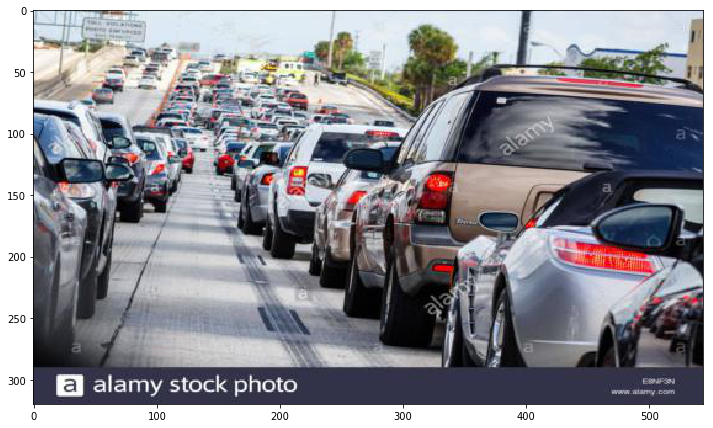

In [30]:
i = 5
plt.imshow(backgrounds[0].astype(np.uint8))
plt.show()

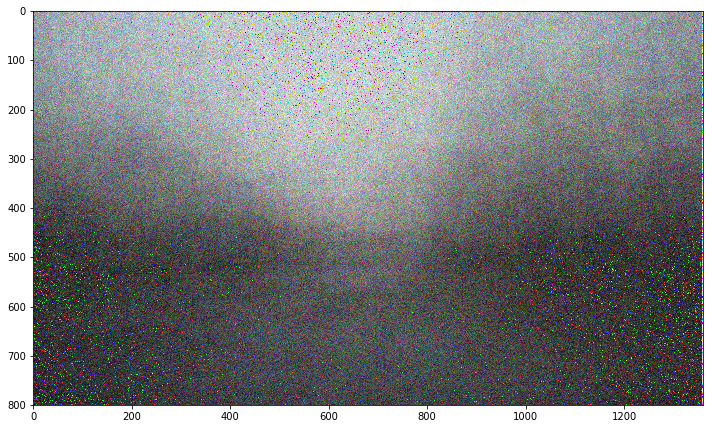

In [48]:
random_weight = 0.1
plt.imshow((random_weight*np.random.normal(0, 255, pic_shape) + (1-random_weight)*pic_avgs[0]).astype(np.uint8))
plt.show()

In [57]:
random_weight = 0.1
i = 0
a = random_weight*np.random.normal(0, 255, pic_shape) + (1-random_weight)*pic_avgs[i]
b = random_weight*np.random.normal(0, 255, pic_shape) + (1-random_weight)*pic_avgs[i+1]
np.mean(np.abs(a - b))

29.497280092431943

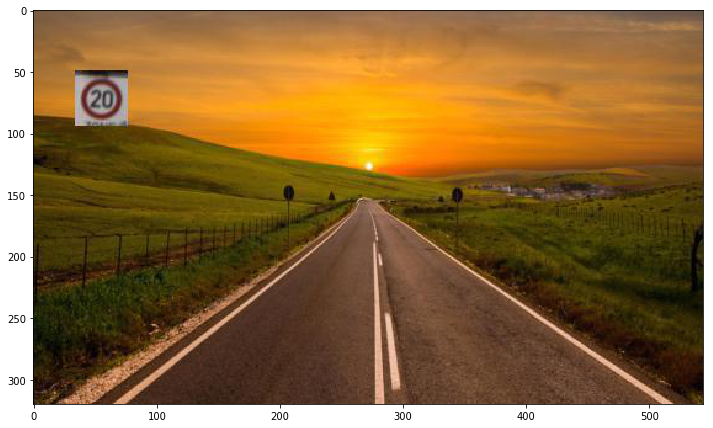

In [37]:
plt.imshow(imread(os.path.join(res_dir, "0.jpg")))
plt.show()

In [38]:
with open(os.path.join(res_dir, "gt.txt")) as gt_f:
    line = gt_f.readline()

In [36]:
line

'0.ppm;34;49;77;94;0\n'

In [8]:
res = pool.apply_async(os.getpid, ()) # runs in *only* one process
print(res.get(timeout=1))              # prints the PID of that process

12634


In [1]:
a = [1,2,3]
b = [3,4,5]
a+b

[1, 2, 3, 3, 4, 5]

In [2]:
a += b
a

[1, 2, 3, 3, 4, 5]

In [6]:
set().union(a,b)

{1, 2, 3, 4, 5}